In [1]:
import matplotlib

from sectional_v2.data_info import get_nice_name_case
from sectional_v2.util.imports.import_fields_xr_v2 import import_constants
from sectional_v2.util.imports.get_fld_fixed import get_field_fixed
from useful_scit.imps import (np, xr, plt, pd)

# load and autoreload
from IPython import get_ipython

# noinspection PyBroadException
from sectional_v2.util.naming_conventions import var_info
from sectional_v2.util.naming_conventions.var_info import get_fancy_var_name

try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

/home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME/
/home/ubuntu/mnts/nird/projects/SECTIONAL_v2/sectional_v2/data_info/area_defs.csv
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
model = 'NorESM' 

In [3]:

from sectional_v2.constants import get_plotpath
from sectional_v2.util.practical_functions import make_folders

plot_path = get_plotpath('comparison') + '/scatter/'
print(plot_path)
make_folders(plot_path)

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/


In [4]:
from_time = '2008-01'
to_time = '2010-12'
pmin = 850.  # minimum pressure level
avg_over_lev = True  # True#True#False#True
pressure_adjust = True  # Can only be false if avg_over_lev false. Plots particular hybrid sigma lev
#if avg_over_lev:
#    pressure_adjust = True
p_levels = [1013.,900., 800., 700., 600.]  # used if not avg

lev_lim =0.

In [5]:
cases_sec = ['SECTv21_ctrl_koagD']#, 'PD_SECT_CHC7_diurnal']  # Sect ac eq.20, corr NPF diam, fxdt, vdiam, 1.5xBVOC']
cases_orig = ['noSECTv21_ox_ricc_dd']  # , 'Original eq.18','Original eq.20, 1.5xBVOC','Original eq.20, rednuc']
#cases_orig = ['noSECTv21_default_dd']  # , 'Original eq.18','Original eq.20, 1.5xBVOC','Original eq.20, rednuc']
cases = cases_orig + cases_sec

In [6]:
var_subl = ['cb_SOA_NA','cb_NA','cb_SO4_NA', 'cb_H2SO4','cb_SOA_LV','SOA_NAcoagTend','SO4_NAcoagTend']#,'SOA_NA','SO4_NA']

In [7]:
var1 = var_subl[0]
var2 = var_subl[1]
cases_dic ={}
for case in cases:
    dummy = get_field_fixed(case,
                            var_subl,
                            from_time, to_time,
                            pressure_adjust=pressure_adjust)
    print(dummy)
    ds_constants = import_constants(case)
    
    dummy = xr.merge([dummy, ds_constants])
    cases_dic[case] = dummy.copy()

Loading file: /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//Fields_pressure_coordinates/NorESM/noSECTv21_ox_ricc_dd/SO4_NAcoagTend_NorESM_noSECTv21_ox_ricc_dd_2008-01-2010-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//Fields_pressure_coordinates/NorESM/noSECTv21_ox_ricc_dd/cb_H2SO4_NorESM_noSECTv21_ox_ricc_dd_2008-01-2010-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//Fields_pressure_coordinates/NorESM/noSECTv21_ox_ricc_dd/cb_SOA_NA_NorESM_noSECTv21_ox_ricc_dd_2008-01-2010-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//Fields_pressure_coordinates/NorESM/noSECTv21_ox_ricc_dd/cb_SO4_NA_NorESM_noSECTv21_ox_ricc_dd_2008-01-2010-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//Fields_pressure_coordinates/NorESM/noSECTv21_ox_ricc_dd/cb_SOA_LV_NorESM_noSECTv21_ox_ricc_dd_2008-01-2010-12.nc
Loading file: /home/ubuntu/mnts/nird/projects/

In [8]:
# select values close to surface:
for case in cases:
    _ds = cases_dic[case]
    _ds = _ds.sel(lev=slice(lev_lim,None))#sel(lev=slice(20,None))
    cases_dic[case] = _ds

In [10]:
for var in ['H2SO4','SOA_LV']:
    for case in cases:
        _ds = cases_dic[case]
        _ds.load()
        if var in _ds.data_vars:
            if _ds[var].units=='mol/mol':
                _ds[var] = _ds[var]*1e12
                _ds[var].attrs['units']='ppt'

In [11]:
for case in cases:
    _ds = cases_dic[case]
    _ds['NAcoagTend']=_ds['SOA_NAcoagTend']+_ds['SO4_NAcoagTend']

In [12]:
for case in cases:
    _ds = cases_dic[case]
    coagn = 'COAGNUCL'
    if coagn not in _ds.data_vars:
        continue
    if _ds[coagn].units=='/s':
        _ds[coagn] = _ds[coagn]*60*60
        _ds[coagn].attrs['units']='hour$^{-1}$'
        print('hey')

        
var = var1
dummy
case_sec = cases_sec[0]
case_orig = cases_orig[0]
ds_diff = (cases_dic[case_sec]- cases_dic[case_orig])#.isel(lev=slice(20,None))
for var in var_subl:
    ds_diff[var+'_'+case_sec] = cases_dic[case_sec][var]#.isel(lev=slice(20,None))
    ds_diff[var+'_'+case_orig] = cases_dic[case_orig][var]#.isel(lev=slice(20,None))
ds_diff.load()
for var in var_subl:
    for case in cases:
        ds_diff[f'log{var}_{case}'] = np.log10(ds_diff[f'{var}_{case}'])#+'_'+ case_orig])

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/core/computation.py:604: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


In [14]:
import importlib as il
from useful_scit.util import conditional_stats
il.reload(conditional_stats)
def _plt_2dhist(ds_diff, xvar, yvar, nr_bins=40, yscale='symlog', xscale='log',
                xlim = [1e-6,1e-2],ylim=[5.,1e3], ax=None):
    """
    xvar = f'NUCLRATE_{case_orig}'
    yvar='NCONC01'
    xlim = [1e-6,1e-2]
    ylim=[1,1e3]
    nr_bins = 40
    yscale='symlog'
    xscale='log'
    """
    print(xlim)
    print(ylim)
    varList = [xvar, yvar]#f'NUCLRATE_{case_orig}',f'logNUCLRATE_{case_orig}',f'logSOA_LV_{case_orig}',f'logH2SO4_{case_orig}',f'logNCONC01_{case_orig}',f'logN_AER_{case_orig}',f'N_AER_{case_orig}',f'H2SO4_{case_orig}','NCONC01']
    dims = tuple(ds_diff[varList].dims)
    _ds_s = ds_diff[varList].stack(ind=dims)#('lat','lon','lev','time'))


    ybins = mk_bins(ylim[0], vmax = ylim[1], nr_bins=nr_bins, scale=yscale)
    xbins = mk_bins(xlim[0],vmax=xlim[1], nr_bins=nr_bins, scale=xscale)
    data=_ds_s.to_dataframe()
    lim=0
    #data = -data[(data['NCONC01']<lim)]# | (data['NCONC01']>=lim)]
    x=data[xvar]#f'NUCLRATE_{case_orig}']
    y=data[yvar]#'NCONC01']
    if ax is None:
        fig, ax = plt.subplots(1)
    h =ax.hist2d(x,y,bins=[xbins,ybins], cmap='Reds')#,extent=[-3,3,-300,20],yscale='symlog')
    plt.colorbar(h[3], ax=ax, format = OOMFormatter(4, mathText=False))
    #cb = fig.colorbar(c, ax=ax)
    if yscale =='symlog':
        ax.set_yscale('symlog', linthreshy=ylim[0], linscaley=ylim[0]/10,subsy=[2,3,4,5,6,7,8,9])
        yt = ax.get_yticks()
        ml = np.abs(yt[yt!=0]).min()
        ytl = yt
        ytl[(yt==ml)|(yt==-ml)]=None
        ax.set_yticks(ticks=yt)#[y for y in yt if y!=0])#,
        ax.set_yticklabels(ytl)#[-1e2,-1e1,-1e0,1e0,1e1,1e2])


    elif yscale =='log':
        print('set log scale')
        ax.set_yscale('log')#, linthreshy=ylim[0], linscaley=ylim[0]/10,subsy=[2,3,4,5,6,7,8,9])
        
    #ax.set_yticks([y for y in yt if y!=0])#[-1e2,-1e1,-1e0,1e0,1e1,1e2])
    ax.set_xscale('log')
    return ax
    #plt.show()

def mk_bins(v, vmax = 1e3, nr_bins=20, scale='symlog'):
    if scale=='symlog':
        ybins = np.geomspace(v, vmax, int(nr_bins)/2)
        ybins = ybins - ybins[0]
        ybins = [*-ybins[::-1], *ybins[1:]]
    elif scale=='log':
        ybins = np.geomspace(v, vmax, nr_bins)
    elif scale=='neglog':
        ybins = -np.geomspace(v, vmax, nr_bins)[::-1]

    return ybins


class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin=None, vmax=None):
        self.format = self.fformat
        if self._useMathText:
            self.format = r'$\mathdefault{%s}$' % self.format

In [15]:
from useful_scit.plot.fig_manip import subp_insert_abc

In [16]:
def _plt_tmp(_ds,axs,var_xl, var_diff, xlims,ylim=[5.,1e3], yscale='symlog', case_base = case_orig):
    for var,ax in zip(var_xl, axs.flatten()):
        print(var)
        xlim = xlims[var]
        h = _plt_2dhist(_ds,f'{var}_{case_base}', var_diff,
                nr_bins=40,
                xlim=xlim, ax=ax,
                        ylim=ylim,
                       yscale=yscale)
        uni = var_info.get_fancy_unit_xr(_ds[var],
                                     var)
        ax.set_xlabel(f'{get_fancy_var_name(var)} [{uni}]')
        ax.plot(xlim,[0,0], linewidth=.5, c='k')

    uni = var_info.get_fancy_unit_xr(_ds[var_diff],
                           var_diff)
    fvar_diff = get_fancy_var_name(var_diff)
    ylab = f'$\Delta${fvar_diff} [{uni}]'
    for ax in axs[:,0]:
        ax.set_ylabel(ylab)
    
    subp_insert_abc(axs)

    suptit =f'{get_nice_name_case(case_sec)}-{get_nice_name_case(case_base)} vs.  '
    suptit =f'{fvar_diff}$(m_1)-${fvar_diff}$(m_2)$ vs. $X(m_2)$ \n for $m_1=${get_nice_name_case(case_sec)}, $m_2=${get_nice_name_case(case_base)}'
    fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
    stit = fig.suptitle(suptit,  fontsize=12, y=.98)
    
    return stit

In [17]:
def _plt_tmp_mv1v2(_ds,axs,var_xl, xlims, yscale='log', case_base = case_orig, case_oth = case_sec):
    for var,ax in zip(var_xl, axs.flatten()):
        print(var)
        xlim = xlims[var]
        h = _plt_2dhist(_ds,f'{var}_{case_base}', f'{var}_{case_oth}',
                        nr_bins=40,
                        xlim=xlim, 
                        ax=ax,
                        ylim=xlim,
                       yscale=yscale)
        uni = var_info.get_fancy_unit_xr(_ds[var],
                                     var)
        ax.set_xlabel(f'{get_fancy_var_name(var)},{get_nice_name_case(case_base)} [{uni}]')
        ax.set_ylabel(f'{get_fancy_var_name(var)},{get_nice_name_case(case_oth)} [{uni}]')
        #ax.plot(xlim,[0,0], linewidth=.5, c='k')
        ax.set_ylim(xlim)
        ax.set_ylim(xlim)
    
    subp_insert_abc(axs)

    suptit =f'{get_nice_name_case(case_sec)}-{get_nice_name_case(case_base)} vs.  '
    suptit =f'{fvar_diff}$(m_1)-${fvar_diff}$(m_2)$ vs. $X(m_2)$ \n for $m_1=${get_nice_name_case(case_sec)}, $m_2=${get_nice_name_case(case_base)}'
    fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
    stit = fig.suptitle(suptit,  fontsize=12, y=.98)
    
    return stit

NameError: name 'case_base' is not defined

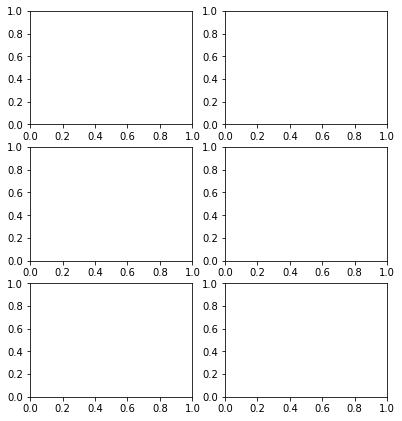

In [27]:
#case_base=case_orig

fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=False)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=100.
_ds = ds_diff.sel(lev=slice(lev_min, None))
var_diff = 'NCONC01_'+case_base
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[10,5e3],
    'COAGNUCL':[1e-4,1],
}

stit = _plt_tmp_mv1v2(_ds,axs,var_xl, xlims)#,ylim=[5.,1e3], yscale='log')
                      #_plt_tmp(_ds,axs,var_xl, var_diff, xlims, ylim=[10,5e3], yscale='log', case_base=case_base)
uni = var_info.get_fancy_unit_xr(_ds[var_diff], var_diff)
fvar_diff = get_fancy_var_name('NCONC01')

    
suptit =f'{fvar_diff}$(m)$ vs. $X(m)$ \n for $m=${get_nice_name_case(case_base)}'
fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
stit = fig.suptitle(suptit,  fontsize=12, y=.98)
fn = plot_path + f'2dhist_abs{case_base}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
fig.tight_layout()
plt.show()
print(fn)

# ABSOLUTE RELATIONSHIPS:

### All below 100 hPa

In [159]:
case_sec

'SECTv21_ctrl_koagD'

### Case: OsloAero_imp

NUCLRATE
[1e-06, 10]
[10, 5000.0]


KeyError: 'NUCLRATE_noSECTv21_ox_ricc_dd'

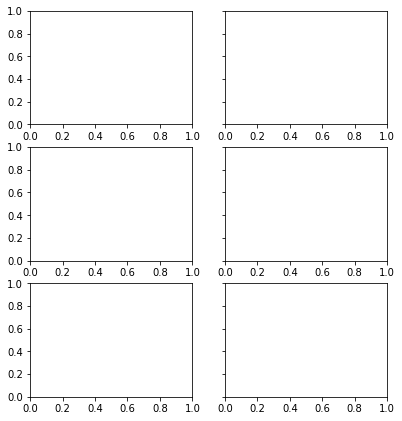

In [28]:
case_base=case_orig

fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=100.
_ds = ds_diff.sel(lev=slice(lev_min, None))
var_diff = 'NCONC01_'+case_base
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[10,5e3],
    'COAGNUCL':[1e-4,1],
}

stit = _plt_tmp(_ds,axs,var_xl, var_diff, xlims, ylim=[10,5e3], yscale='log', case_base=case_base)
uni = var_info.get_fancy_unit_xr(_ds[var_diff], var_diff)
fvar_diff = get_fancy_var_name('NCONC01')
for ax in axs[:,0]:
    print('hey')
    ax.set_ylabel(f'{fvar_diff} [{uni}]')

    
suptit =f'{fvar_diff}$(m)$ vs. $X(m)$ \n for $m=${get_nice_name_case(case_base)}'
fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
stit = fig.suptitle(suptit,  fontsize=12, y=.98)

fn = plot_path + f'2dhist_abs{case_base}.'
fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

### Case: OsloAeroSec

NUCLRATE
set log scale
GR
set log scale
H2SO4
set log scale
SOA_LV
set log scale
NCONC01
set log scale
COAGNUCL
set log scale
hey
hey
hey


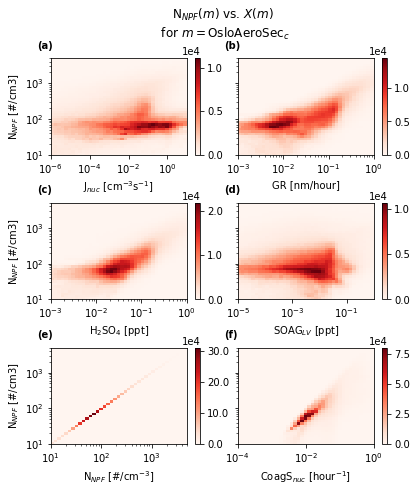

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_absSECTv21_ctrl_koagD.


In [165]:
case_base=case_sec

fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=100.
_ds = ds_diff.sel(lev=slice(lev_min, None))
var_diff = 'NCONC01_'+case_base
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[10,5e3],
    'COAGNUCL':[1e-4,1],
}

stit = _plt_tmp(_ds,axs,var_xl, var_diff, xlims, ylim=[10,5e3], yscale='log', case_base=case_base)
uni = var_info.get_fancy_unit_xr(_ds[var_diff], var_diff)
fvar_diff = get_fancy_var_name('NCONC01')
for ax in axs[:,0]:
    print('hey')
    ax.set_ylabel(f'{fvar_diff} [{uni}]')

    
suptit =f'{fvar_diff}$(m)$ vs. $X(m)$ \n for $m=${get_nice_name_case(case_base)}'
fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
stit = fig.suptitle(suptit,  fontsize=12, y=.98)

fn = plot_path + f'2dhist_abs{case_base}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

## Surface

NUCLRATE
set log scale
GR
set log scale
H2SO4
set log scale
SOA_LV
set log scale
NCONC01
set log scale
COAGNUCL
set log scale
hey
hey
hey


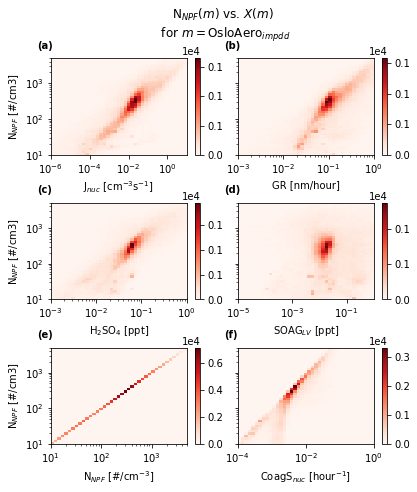

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_absnoSECTv21_ox_ricc_dd.


In [77]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=100.
#_ds = ds_diff.sel(lev=slice(lev_min, None))
_ds = ds_diff.isel(lev=-1)#lev=slice(lev_min, None))

var_diff = 'NCONC01_'+case_orig
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[10,5e3],
    'COAGNUCL':[1e-4,1],
}

stit = _plt_tmp(_ds,axs,var_xl, var_diff, xlims, ylim=[10,5e3], yscale='log')
uni = var_info.get_fancy_unit_xr(_ds[var_diff], var_diff)
fvar_diff = get_fancy_var_name('NCONC01')
for ax in axs[:,0]:
    print('hey')
    ax.set_ylabel(f'{fvar_diff} [{uni}]')

    
suptit =f'{fvar_diff}$(m)$ vs. $X(m)$ \n for $m=${get_nice_name_case(case_orig)}'
fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
stit = fig.suptitle(suptit,  fontsize=12, y=.98)

fn = plot_path + f'2dhist_abs{case_orig}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

### Case: OsloAeroSec

NUCLRATE
set log scale
GR
set log scale
H2SO4
set log scale
SOA_LV
set log scale
NCONC01
set log scale
COAGNUCL
set log scale
hey
hey
hey


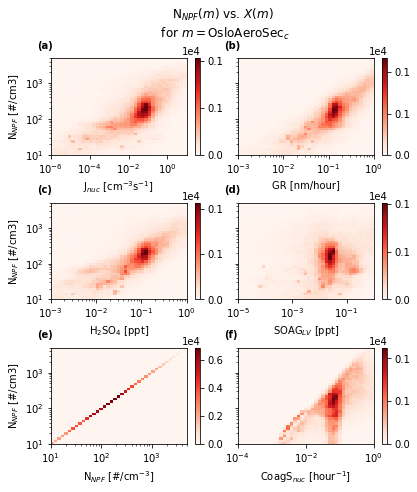

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_absSECTv21_ctrl_koagD.


In [173]:
case_base=case_sec

fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=850.
_ds = ds_diff.isel(lev=-1)#slice(lev_min, None))
var_diff = 'NCONC01_'+case_base
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[10,5e3],
    'COAGNUCL':[1e-4,1],
}

stit = _plt_tmp(_ds,axs,var_xl, var_diff, xlims, ylim=[10,5e3], yscale='log', case_base=case_base)
uni = var_info.get_fancy_unit_xr(_ds[var_diff], var_diff)
fvar_diff = get_fancy_var_name('NCONC01')
for ax in axs[:,0]:
    print('hey')
    ax.set_ylabel(f'{fvar_diff} [{uni}]')

    
suptit =f'{fvar_diff}$(m)$ vs. $X(m)$ \n for $m=${get_nice_name_case(case_base)}'
fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
stit = fig.suptitle(suptit,  fontsize=12, y=.98)

fn = plot_path + f'2dhist_abs{case_base}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

### below 850.

### Case: OsloAero_imp

NUCLRATE
set log scale
GR
set log scale
H2SO4
set log scale
SOA_LV
set log scale
NCONC01
set log scale
COAGNUCL
set log scale
hey
hey
hey


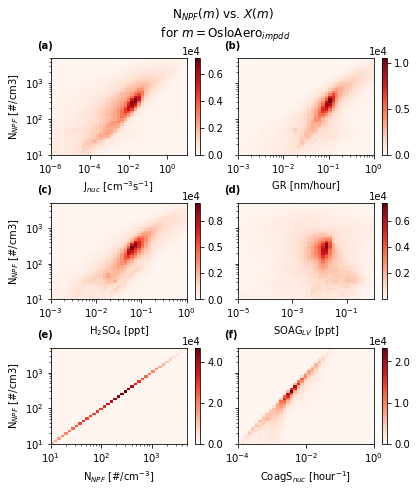

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_absnoSECTv21_ox_ricc_dd.


In [167]:
case_base=case_orig

fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=850.
_ds = ds_diff.sel(lev=slice(lev_min, None))
var_diff = 'NCONC01_'+case_base
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[10,5e3],
    'COAGNUCL':[1e-4,1],
}

stit = _plt_tmp(_ds,axs,var_xl, var_diff, xlims, ylim=[10,5e3], yscale='log', case_base=case_base)
uni = var_info.get_fancy_unit_xr(_ds[var_diff], var_diff)
fvar_diff = get_fancy_var_name('NCONC01')
for ax in axs[:,0]:
    print('hey')
    ax.set_ylabel(f'{fvar_diff} [{uni}]')

    
suptit =f'{fvar_diff}$(m)$ vs. $X(m)$ \n for $m=${get_nice_name_case(case_base)}'
fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
stit = fig.suptitle(suptit,  fontsize=12, y=.98)

fn = plot_path + f'2dhist_abs{case_base}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

### Case: OsloAeroSec

NUCLRATE
set log scale
GR
set log scale
H2SO4
set log scale
SOA_LV
set log scale
NCONC01
set log scale
COAGNUCL
set log scale
hey
hey
hey


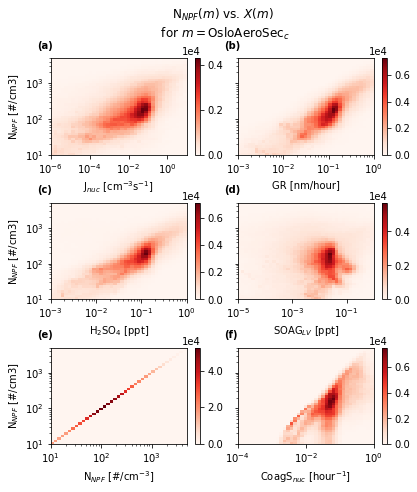

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_absSECTv21_ctrl_koagD.


In [168]:
case_base=case_sec

fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=850.
_ds = ds_diff.sel(lev=slice(lev_min, None))
var_diff = 'NCONC01_'+case_base
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[10,5e3],
    'COAGNUCL':[1e-4,1],
}

stit = _plt_tmp(_ds,axs,var_xl, var_diff, xlims, ylim=[10,5e3], yscale='log', case_base=case_base)
uni = var_info.get_fancy_unit_xr(_ds[var_diff], var_diff)
fvar_diff = get_fancy_var_name('NCONC01')
for ax in axs[:,0]:
    print('hey')
    ax.set_ylabel(f'{fvar_diff} [{uni}]')

    
suptit =f'{fvar_diff}$(m)$ vs. $X(m)$ \n for $m=${get_nice_name_case(case_base)}'
fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
stit = fig.suptitle(suptit,  fontsize=12, y=.98)

fn = plot_path + f'2dhist_abs{case_base}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

### above 850.

### Case: OsloAero_imp

NUCLRATE
set log scale
GR
set log scale
H2SO4
set log scale
SOA_LV
set log scale
NCONC01
set log scale
COAGNUCL
set log scale
hey
hey
hey


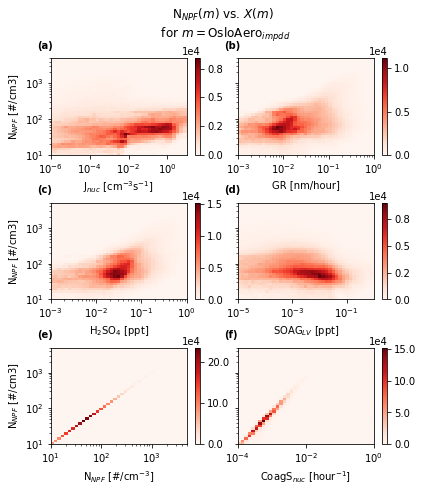

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_absnoSECTv21_ox_ricc_dd.


In [170]:
case_base=case_orig

fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=850.
_ds = ds_diff.sel(lev=slice(None,lev_min))
var_diff = 'NCONC01_'+case_base
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[10,5e3],
    'COAGNUCL':[1e-4,1],
}

stit = _plt_tmp(_ds,axs,var_xl, var_diff, xlims, ylim=[10,5e3], yscale='log', case_base=case_base)
uni = var_info.get_fancy_unit_xr(_ds[var_diff], var_diff)
fvar_diff = get_fancy_var_name('NCONC01')
for ax in axs[:,0]:
    print('hey')
    ax.set_ylabel(f'{fvar_diff} [{uni}]')

    
suptit =f'{fvar_diff}$(m)$ vs. $X(m)$ \n for $m=${get_nice_name_case(case_base)}'
fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
stit = fig.suptitle(suptit,  fontsize=12, y=.98)

fn = plot_path + f'2dhist_abs{case_base}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

### Case: OsloAeroSec

NUCLRATE
set log scale
GR
set log scale
H2SO4
set log scale
SOA_LV
set log scale
NCONC01
set log scale
COAGNUCL
set log scale
hey
hey
hey


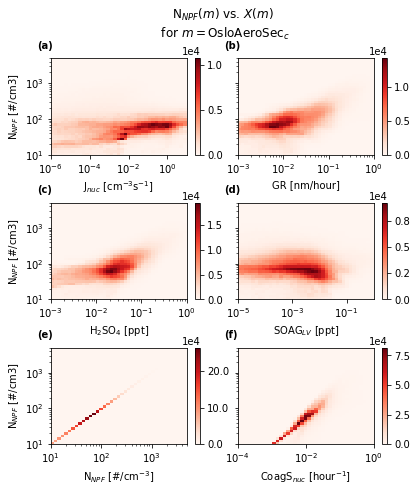

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_absSECTv21_ctrl_koagD.


In [171]:
case_base=case_sec

fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=850.
#_ds = ds_diff.sel(lev=slice(lev_min, None))
_ds = ds_diff.sel(lev=slice(None,lev_min))

var_diff = 'NCONC01_'+case_base
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[10,5e3],
    'COAGNUCL':[1e-4,1],
}

stit = _plt_tmp(_ds,axs,var_xl, var_diff, xlims, ylim=[10,5e3], yscale='log', case_base=case_base)
uni = var_info.get_fancy_unit_xr(_ds[var_diff], var_diff)
fvar_diff = get_fancy_var_name('NCONC01')
for ax in axs[:,0]:
    print('hey')
    ax.set_ylabel(f'{fvar_diff} [{uni}]')

    
suptit =f'{fvar_diff}$(m)$ vs. $X(m)$ \n for $m=${get_nice_name_case(case_base)}'
fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
stit = fig.suptitle(suptit,  fontsize=12, y=.98)

fn = plot_path + f'2dhist_abs{case_base}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

### Mask by COAGNUCL

In [199]:
gr = ds_diff['GR_' + case_orig]
coag = ds_diff['COAGNUCL_' + case_orig]
ma = (coag) > coag.quantile(.75)

### Case: OsloAero_imp

NUCLRATE
[1e-06, 10]
[10, 5000.0]
set log scale
GR
[0.001, 1]
[10, 5000.0]
set log scale
H2SO4
[0.001, 1]
[10, 5000.0]
set log scale
SOA_LV
[1e-05, 1]
[10, 5000.0]
set log scale
NCONC01
[10, 5000.0]
[10, 5000.0]
set log scale
COAGNUCL
[0.0001, 1]
[10, 5000.0]
set log scale
hey
hey
hey


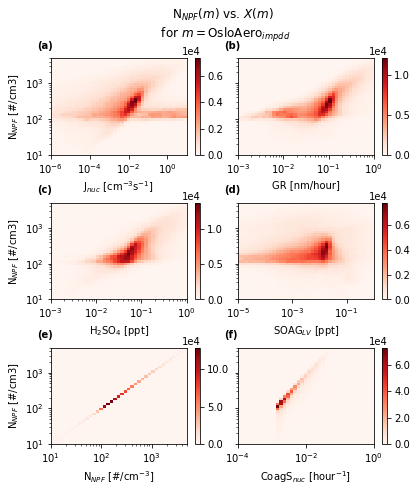

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_absnoSECTv21_ox_ricc_dd.


In [195]:
case_base=case_orig

fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=850.
_ds = ds_diff.where(ma)#lev=slice(None,lev_min))
var_diff = 'NCONC01_'+case_base
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[10,5e3],
    'COAGNUCL':[1e-4,1],
}

stit = _plt_tmp(_ds,axs,var_xl, var_diff, xlims, ylim=[10,5e3], yscale='log', case_base=case_base)
uni = var_info.get_fancy_unit_xr(_ds[var_diff], var_diff)
fvar_diff = get_fancy_var_name('NCONC01')
for ax in axs[:,0]:
    print('hey')
    ax.set_ylabel(f'{fvar_diff} [{uni}]')

    
suptit =f'{fvar_diff}$(m)$ vs. $X(m)$ \n for $m=${get_nice_name_case(case_base)}'
fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
stit = fig.suptitle(suptit,  fontsize=12, y=.98)

fn = plot_path + f'2dhist_abs{case_base}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

### Case: OsloAeroSec

NUCLRATE
[1e-06, 10]
[10, 5000.0]
set log scale
GR
[0.001, 1]
[10, 5000.0]
set log scale
H2SO4
[0.001, 1]
[10, 5000.0]
set log scale
SOA_LV
[1e-05, 1]
[10, 5000.0]
set log scale
NCONC01
[10, 5000.0]
[10, 5000.0]
set log scale
COAGNUCL
[0.0001, 1]
[10, 5000.0]
set log scale
hey
hey
hey


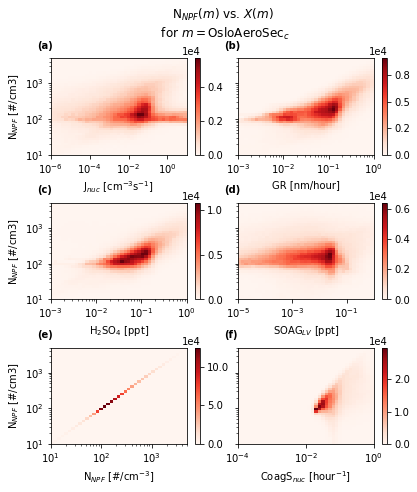

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_absSECTv21_ctrl_koagD.


In [200]:
case_base=case_sec

fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=850.
#_ds = ds_diff.sel(lev=slice(lev_min, None))
_ds = ds_diff.where(ma)#lev=slice(None,lev_min))

var_diff = 'NCONC01_'+case_base
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[10,5e3],
    'COAGNUCL':[1e-4,1],
}

stit = _plt_tmp(_ds,axs,var_xl, var_diff, xlims, ylim=[10,5e3], yscale='log', case_base=case_base)
uni = var_info.get_fancy_unit_xr(_ds[var_diff], var_diff)
fvar_diff = get_fancy_var_name('NCONC01')
for ax in axs[:,0]:
    print('hey')
    ax.set_ylabel(f'{fvar_diff} [{uni}]')

    
suptit =f'{fvar_diff}$(m)$ vs. $X(m)$ \n for $m=${get_nice_name_case(case_base)}'
fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
stit = fig.suptitle(suptit,  fontsize=12, y=.98)

fn = plot_path + f'2dhist_abs{case_base}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

### lowest 50 %

In [211]:
gr = ds_diff['GR_' + case_orig]
coag = ds_diff['COAGNUCL_' + case_orig]
ma = (coag) < coag.quantile(.75)

### Case: OsloAero_imp

NUCLRATE
[1e-06, 10]
[10, 5000.0]
set log scale
GR
[0.001, 1]
[10, 5000.0]
set log scale
H2SO4
[0.001, 1]
[10, 5000.0]
set log scale
SOA_LV
[1e-05, 1]
[10, 5000.0]
set log scale
NCONC01
[10, 5000.0]
[10, 5000.0]
set log scale
COAGNUCL
[0.0001, 1]
[10, 5000.0]
set log scale
hey
hey
hey


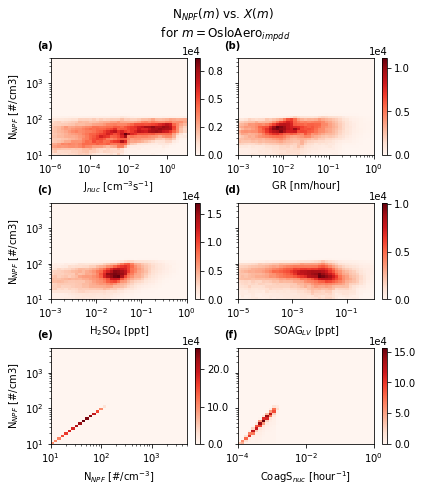

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_absnoSECTv21_ox_ricc_dd.


In [212]:
case_base=case_orig

fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=850.
_ds = ds_diff.where(ma)#lev=slice(None,lev_min))
var_diff = 'NCONC01_'+case_base
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[10,5e3],
    'COAGNUCL':[1e-4,1],
}

stit = _plt_tmp(_ds,axs,var_xl, var_diff, xlims, ylim=[10,5e3], yscale='log', case_base=case_base)
uni = var_info.get_fancy_unit_xr(_ds[var_diff], var_diff)
fvar_diff = get_fancy_var_name('NCONC01')
for ax in axs[:,0]:
    print('hey')
    ax.set_ylabel(f'{fvar_diff} [{uni}]')

    
suptit =f'{fvar_diff}$(m)$ vs. $X(m)$ \n for $m=${get_nice_name_case(case_base)}'
fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
stit = fig.suptitle(suptit,  fontsize=12, y=.98)

fn = plot_path + f'2dhist_abs{case_base}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

### Case: OsloAeroSec

NUCLRATE
[1e-06, 10]
[10, 5000.0]
set log scale
GR
[0.001, 1]
[10, 5000.0]
set log scale
H2SO4
[0.001, 1]
[10, 5000.0]
set log scale
SOA_LV
[1e-05, 1]
[10, 5000.0]
set log scale
NCONC01
[10, 5000.0]
[10, 5000.0]
set log scale
COAGNUCL
[0.0001, 1]
[10, 5000.0]
set log scale
hey
hey
hey


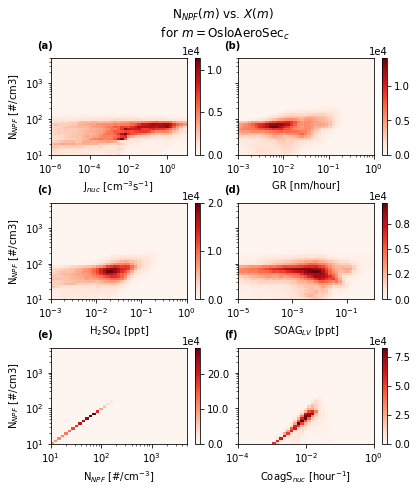

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_absSECTv21_ctrl_koagD.


In [213]:
case_base=case_sec

fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=850.
#_ds = ds_diff.sel(lev=slice(lev_min, None))
_ds = ds_diff.where(ma)#lev=slice(None,lev_min))

var_diff = 'NCONC01_'+case_base
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[10,5e3],
    'COAGNUCL':[1e-4,1],
}

stit = _plt_tmp(_ds,axs,var_xl, var_diff, xlims, ylim=[10,5e3], yscale='log', case_base=case_base)
uni = var_info.get_fancy_unit_xr(_ds[var_diff], var_diff)
fvar_diff = get_fancy_var_name('NCONC01')
for ax in axs[:,0]:
    print('hey')
    ax.set_ylabel(f'{fvar_diff} [{uni}]')

    
suptit =f'{fvar_diff}$(m)$ vs. $X(m)$ \n for $m=${get_nice_name_case(case_base)}'
fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
stit = fig.suptitle(suptit,  fontsize=12, y=.98)

fn = plot_path + f'2dhist_abs{case_base}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

# Difference:


## Main plot: below 100 hPa:

NUCLRATE
[1e-06, 10]
[5.0, 1000.0]
GR
[0.001, 1]
[5.0, 1000.0]
H2SO4
[0.001, 1]
[5.0, 1000.0]
SOA_LV
[1e-05, 1]
[5.0, 1000.0]
NCONC01
[0.5, 1000.0]
[5.0, 1000.0]
COAGNUCL
[1e-05, 0.1]
[5.0, 1000.0]


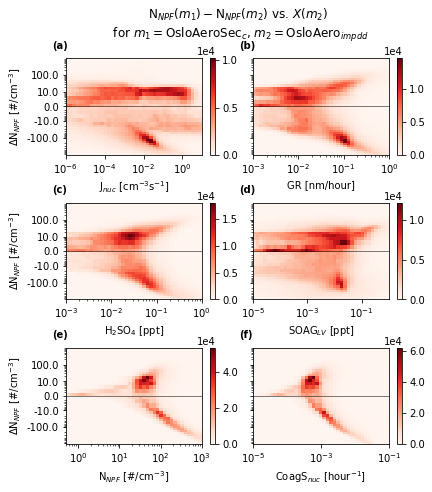

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_noSECTv21_ox_ricc_dd_SECTv21_ctrl_koagD.


In [227]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=100.
_ds = ds_diff.sel(lev=slice(lev_min, None))
var_diff = 'NCONC01'
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[5e-1,1e3],
    'COAGNUCL':[1e-5,.1],

}

stit = _plt_tmp(_ds,axs,var_xl, var_diff, xlims)
fn = plot_path + f'2dhist_{case_orig}_{case_sec}.'
fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

## Surface layer

NUCLRATE
[1e-06, 10]
[5.0, 1000.0]
GR
[0.001, 1]
[5.0, 1000.0]
H2SO4
[0.001, 1]
[5.0, 1000.0]
SOA_LV
[1e-05, 1]
[5.0, 1000.0]
NCONC01
[0.5, 1000.0]
[5.0, 1000.0]
COAGNUCL
[1e-05, 0.1]
[5.0, 1000.0]


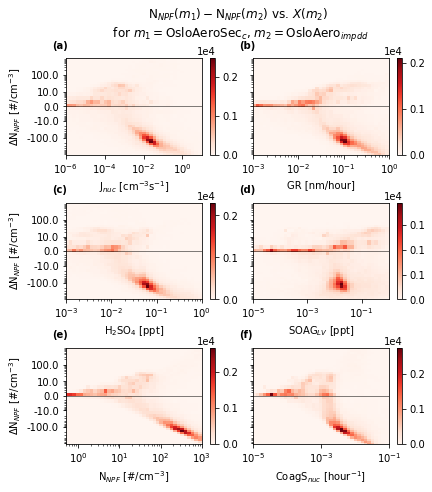

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_noSECTv21_ox_ricc_dd_SECTv21_ctrl_koagD.


In [214]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=100.
_ds = ds_diff.isel(lev=-1)#slice(lev_min, None))
var_diff = 'NCONC01'
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[5e-1,1e3],
    'COAGNUCL':[1e-5,.1],

}

_plt_tmp(_ds,axs,var_xl, var_diff, xlims)
fn = plot_path + f'2dhist_{case_orig}_{case_sec}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

## Up to 850 hPa

NUCLRATE
[1e-06, 10]
[5.0, 1000.0]
GR
[0.001, 1]
[5.0, 1000.0]
H2SO4
[0.001, 1]
[5.0, 1000.0]
SOA_LV
[1e-05, 1]
[5.0, 1000.0]
NCONC01
[0.5, 1000.0]
[5.0, 1000.0]
COAGNUCL
[1e-05, 0.1]
[5.0, 1000.0]


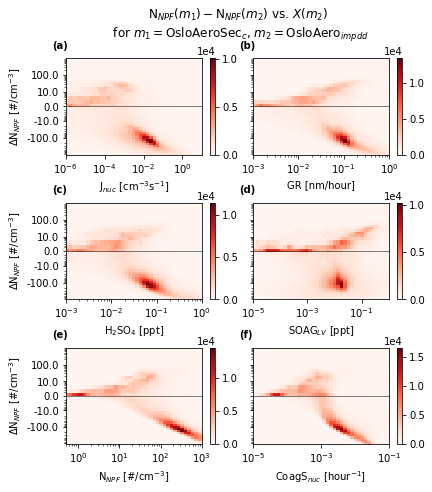

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_noSECTv21_ox_ricc_dd_SECTv21_ctrl_koagD.


In [215]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=850.
_ds = ds_diff.sel(lev=slice(lev_min, None))
var_diff = 'NCONC01'
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[5e-1,1e3],
    'COAGNUCL':[1e-5,.1],
}

_plt_tmp(_ds,axs,var_xl, var_diff, xlims)
fn = plot_path + f'2dhist_{case_orig}_{case_sec}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

## Above 850

NUCLRATE
[1e-06, 10]
[5.0, 1000.0]
GR
[0.001, 1]
[5.0, 1000.0]
H2SO4
[0.001, 1]
[5.0, 1000.0]
SOA_LV
[1e-05, 1]
[5.0, 1000.0]
NCONC01
[0.5, 1000.0]
[5.0, 1000.0]
COAGNUCL
[1e-05, 0.1]
[5.0, 1000.0]


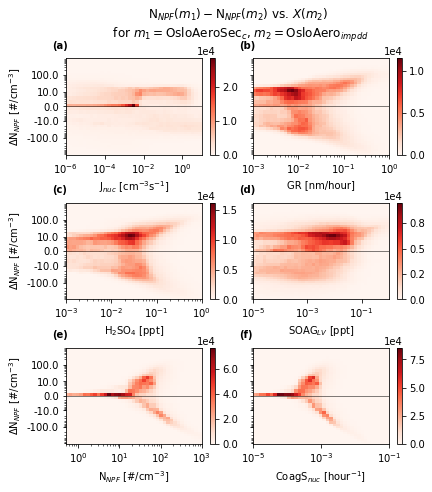

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_noSECTv21_ox_ricc_dd_SECTv21_ctrl_koagD.


In [216]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=850.
_ds = ds_diff.sel(lev=slice(None,lev_min))#, None))
var_diff = 'NCONC01'
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[5e-1,1e3],
    'COAGNUCL':[1e-5,.1],
    
}

_plt_tmp(_ds,axs,var_xl, var_diff, xlims)
fn = plot_path + f'2dhist_{case_orig}_{case_sec}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

## Mask by N_AER?

In [87]:
v= 'logN_AER_noSECTv21_ox_ricc_dd'
mask_ = ds_diff[v] <ds_diff[v].quantile(.5)

NUCLRATE
GR
H2SO4
SOA_LV
NCONC01
COAGNUCL


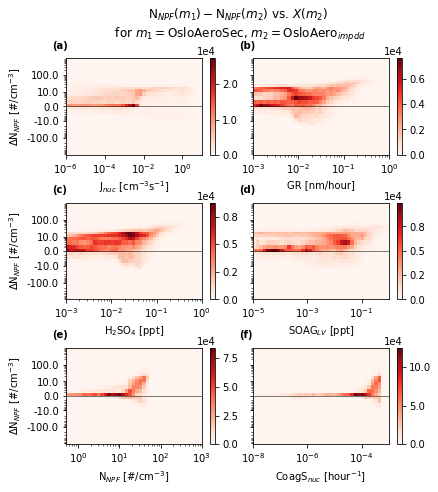

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_noSECTv21_ox_ricc_dd_SECTv21_ctrl.


In [88]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=850.
_ds = ds_diff.where(mask_)#sel(lev=slice(lev_min, None))
var_diff = 'NCONC01'
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[5e-1,1e3],
    'COAGNUCL':[1e-8,1e-3],
}

_plt_tmp(_ds,axs,var_xl, var_diff, xlims)
fn = plot_path + f'2dhist_{case_orig}_{case_sec}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

## Oposite

NUCLRATE
GR
H2SO4
SOA_LV
NCONC01
COAGNUCL


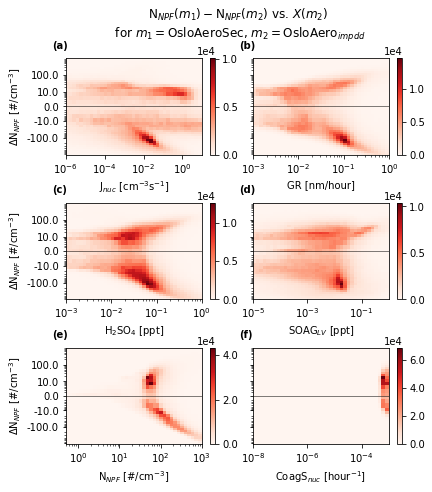

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_noSECTv21_ox_ricc_dd_SECTv21_ctrl.


In [89]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=850.
_ds = ds_diff.where(~mask_)#sel(lev=slice(lev_min, None))
var_diff = 'NCONC01'
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[5e-1,1e3],
    'COAGNUCL':[1e-8,1e-3],
}

_plt_tmp(_ds,axs,var_xl, var_diff, xlims)
fn = plot_path + f'2dhist_{case_orig}_{case_sec}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

## Mask by CoagS?

In [90]:
ds_diff

<xarray.Dataset>
Dimensions:                           (ilev: 33, lat: 96, lev: 32, lon: 144, time: 12, zlon: 1)
Coordinates:
  * lat                               (lat) float64 -90.0 -88.11 ... 88.11 90.0
  * lev                               (lev) float64 3.643 7.595 ... 976.3 992.6
  * zlon                              (zlon) float64 0.0
  * ilev                              (ilev) float64 2.255 5.032 ... 985.1 1e+03
  * lon                               (lon) float64 -180.0 -177.5 ... 177.5
  * time                              (time) datetime64[ns] 2008-01-17 ... 2008-12-17
Data variables:
    gw                                (time, lat) float64 0.0 0.0 ... 0.0 0.0
    hyam                              (time, lev) float64 0.0 0.0 ... 0.0 0.0
    hybm                              (time, lev) float64 0.0 0.0 ... 0.0 0.0
    P0                                (time) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    hyai                              (time, ilev) float64 0.0 0.0 ... 0.0 0.0
    hybi                              (time, ilev) float64 0.0 0.0 ... 0.0 0.0
    COAGNUCL                          (time, lev, lat, lon) float32 4.1479268e-07 ... 0.001297219
    GR                                (time, lev, lat, lon) float32 -2.2703768e-09 ... -0.009546759
    H2SO4                             (time, lev, lat, lon) float32 -6.002098e-07 ... -0.00860293
    NCONC01                           (time, lev, lat, lon) float32 0.00021677138 ... 2.750648
    NUCLRATE                          (time, lev, lat, lon) float32 0.0 ... -9.8990995e-06
    N_AER                             (time, lev, lat, lon) float32 0.00020493288 ... 2.6899548
    PBLH                              (time, lat, lon) float32 9.168472 ... -0.30747986
    PS                                (time, lat, lon) float32 0.265625 ... 2.7265625
    SOA_LV                            (time, lev, lat, lon) float32 -4.9818497e-16 ... -5.625798e-05
    lat_wg                            (time, lat) float64 0.0 0.0 ... 0.0 0.0
    GRIDAREA                          (lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0
    LANDFRAC                          (lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0
    NCONC01_SECTv21_ctrl              (time, lev, lat, lon) float32 0.005933854 ... 4.738829
    NCONC01_noSECTv21_ox_ricc_dd      (time, lev, lat, lon) float32 0.0057170824 ... 1.9881812
    H2SO4_SECTv21_ctrl                (time, lev, lat, lon) float32 1.293548e-06 ... 0.0045842645
    H2SO4_noSECTv21_ox_ricc_dd        (time, lev, lat, lon) float32 1.8937578e-06 ... 0.013187195
    SOA_LV_SECTv21_ctrl               (time, lev, lat, lon) float32 8.500123e-15 ... 8.967731e-08
    SOA_LV_noSECTv21_ox_ricc_dd       (time, lev, lat, lon) float32 8.998308e-15 ... 5.6347657e-05
    N_AER_SECTv21_ctrl                (time, lev, lat, lon) float32 0.005872433 ... 13.742098
    N_AER_noSECTv21_ox_ricc_dd        (time, lev, lat, lon) float32 0.0056675 ... 11.052143
    COAGNUCL_SECTv21_ctrl             (time, lev, lat, lon) float32 4.8081364e-07 ... 0.0014236104
    COAGNUCL_noSECTv21_ox_ricc_dd     (time, lev, lat, lon) float32 6.602096e-08 ... 0.00012639146
    NUCLRATE_SECTv21_ctrl             (time, lev, lat, lon) float32 0.0 ... 1.4515393e-05
    NUCLRATE_noSECTv21_ox_ricc_dd     (time, lev, lat, lon) float32 0.0 ... 2.4414492e-05
    GR_SECTv21_ctrl                   (time, lev, lat, lon) float32 4.991939e-09 ... 0.0050526564
    GR_noSECTv21_ox_ricc_dd           (time, lev, lat, lon) float32 7.2623156e-09 ... 0.0145994155
    PBLH_SECTv21_ctrl                 (time, lat, lon) float32 198.20114 ... 178.36914
    PBLH_noSECTv21_ox_ricc_dd         (time, lat, lon) float32 189.03267 ... 178.67662
    logNCONC01_noSECTv21_ox_ricc_dd   (time, lev, lat, lon) float32 -2.2428255 ... 0.29845598
    logNCONC01_SECTv21_ctrl           (time, lev, lat, lon) float32 -2.226663 ... 0.67567104
    logH2SO4_noSECTv21_ox_ricc_dd     (time, lev, lat, lon) float32 -5.7226753 ... -1.8798475
    logH2SO4_SECTv21_ctrl          

In [91]:
v= 'COAGNUCL_noSECTv21_ox_ricc_dd'
mask_ = ds_diff[v] <ds_diff[v].quantile(.5)
#v= 'NCONC01_noSECTv21_ox_ricc_dd'
#mask_ = mask_ & (ds_diff[v] >10)#ds_diff[v].quantile(.1))

NUCLRATE
GR
H2SO4
SOA_LV
NCONC01
COAGNUCL


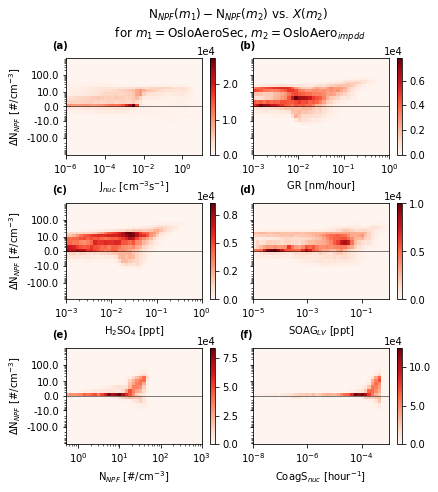

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_noSECTv21_ox_ricc_dd_SECTv21_ctrl.


In [92]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=850.
_ds = ds_diff.where(mask_)#sel(lev=slice(lev_min, None))
var_diff = 'NCONC01'
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[5e-1,1e3],
    'COAGNUCL':[1e-8,1e-3],
}

_plt_tmp(_ds,axs,var_xl, var_diff, xlims)
fn = plot_path + f'2dhist_{case_orig}_{case_sec}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

## Oposite

NUCLRATE
GR
H2SO4
SOA_LV
NCONC01
COAGNUCL


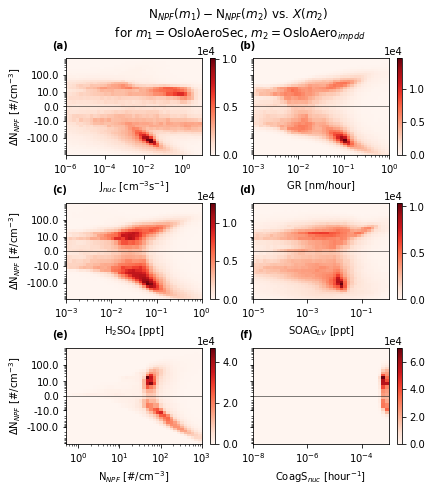

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_noSECTv21_ox_ricc_dd_SECTv21_ctrl.


In [93]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=850.
_ds = ds_diff.where(~mask_)#sel(lev=slice(lev_min, None))
var_diff = 'NCONC01'
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[5e-1,1e3],
    'COAGNUCL':[1e-8,1e-3],
}

_plt_tmp(_ds,axs,var_xl, var_diff, xlims)
fn = plot_path + f'2dhist_{case_orig}_{case_sec}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

## Ratio gr/coag


In [224]:
gr = ds_diff['GR_' + case_orig]
coag = ds_diff['COAGNUCL_' + case_orig]
ma = (gr/coag) > 38

In [223]:
(gr/coag).quantile([.05, .25,.5,.75,.84,.95])

<xarray.DataArray (quantile: 6)>
array([4.89316299e-04, 3.28112273e-02, 4.51477385e+00, 2.31131573e+01,
       3.85373230e+01, 1.29729069e+02])
Coordinates:
  * quantile  (quantile) float64 0.05 0.25 0.5 0.75 0.84 0.95
Attributes:
    mdims:           1
    units:           nm/hour
    long_name:       Growth rate, H2SO4+SOA
    cell_methods:    time: mean
    pressure_coord:  False
    raw_data_path:   /home/ubuntu/mnts/nird/projects/model_output/archive/
    model:           NorESM
    model_name:      NorESM
    case_name:       noSECTv21_ox_ricc_dd
    case:            noSECTv21_ox_ricc_dd
    case_name_nice:  noSECTv21_ox_ricc_dd
    isSectional:     False
    from_time:       2008-01
    to_time:         2008-12
    startyear:       2008
    endyear:         2008

NUCLRATE
[1e-06, 10]
[5.0, 1000.0]
GR
[0.001, 1]
[5.0, 1000.0]
H2SO4
[0.001, 1]
[5.0, 1000.0]
SOA_LV
[1e-05, 1]
[5.0, 1000.0]
NCONC01
[0.5, 1000.0]
[5.0, 1000.0]
COAGNUCL
[1e-05, 0.1]
[5.0, 1000.0]


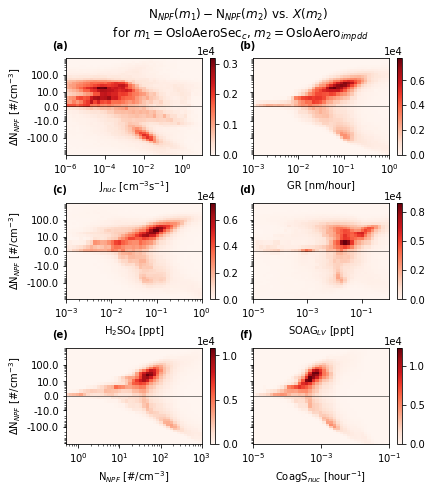

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_noSECTv21_ox_ricc_dd_SECTv21_ctrl_koagD.


In [225]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=850.
_ds = ds_diff.where(ma)#sel(lev=slice(lev_min, None))
var_diff = 'NCONC01'
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[5e-1,1e3],
    'COAGNUCL':[1e-5,.1],
    
}

_plt_tmp(_ds,axs,var_xl, var_diff, xlims)
fn = plot_path + f'2dhist_{case_orig}_{case_sec}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

NUCLRATE
[1e-06, 10]
[5.0, 1000.0]
GR
[0.001, 1]
[5.0, 1000.0]
H2SO4
[0.001, 1]
[5.0, 1000.0]
SOA_LV
[1e-05, 1]
[5.0, 1000.0]
NCONC01
[0.5, 1000.0]
[5.0, 1000.0]
COAGNUCL
[1e-05, 0.1]
[5.0, 1000.0]


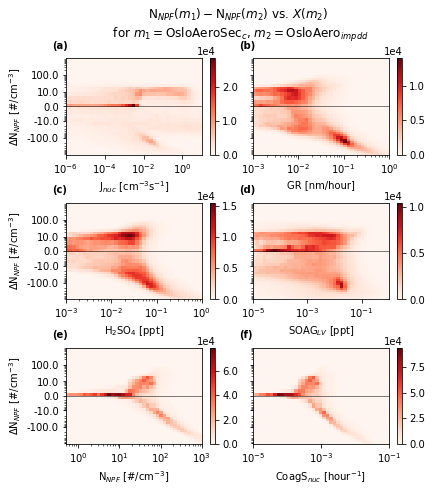

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_noSECTv21_ox_ricc_dd_SECTv21_ctrl_koagD.


In [226]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=850.
_ds = ds_diff.where(~ma)#sel(lev=slice(lev_min, None))
var_diff = 'NCONC01'
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[5e-1,1e3],
    'COAGNUCL':[1e-5,.1],
    
}

_plt_tmp(_ds,axs,var_xl, var_diff, xlims)
fn = plot_path + f'2dhist_{case_orig}_{case_sec}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

## Mask by quantile NCONC01

In [97]:
ds_diff

<xarray.Dataset>
Dimensions:                           (ilev: 33, lat: 96, lev: 32, lon: 144, time: 12, zlon: 1)
Coordinates:
  * lat                               (lat) float64 -90.0 -88.11 ... 88.11 90.0
  * lev                               (lev) float64 3.643 7.595 ... 976.3 992.6
  * zlon                              (zlon) float64 0.0
  * ilev                              (ilev) float64 2.255 5.032 ... 985.1 1e+03
  * lon                               (lon) float64 -180.0 -177.5 ... 177.5
  * time                              (time) datetime64[ns] 2008-01-17 ... 2008-12-17
Data variables:
    gw                                (time, lat) float64 0.0 0.0 ... 0.0 0.0
    hyam                              (time, lev) float64 0.0 0.0 ... 0.0 0.0
    hybm                              (time, lev) float64 0.0 0.0 ... 0.0 0.0
    P0                                (time) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    hyai                              (time, ilev) float64 0.0 0.0 ... 0.0 0.0
    hybi                              (time, ilev) float64 0.0 0.0 ... 0.0 0.0
    COAGNUCL                          (time, lev, lat, lon) float32 4.1479268e-07 ... 0.001297219
    GR                                (time, lev, lat, lon) float32 -2.2703768e-09 ... -0.009546759
    H2SO4                             (time, lev, lat, lon) float32 -6.002098e-07 ... -0.00860293
    NCONC01                           (time, lev, lat, lon) float32 0.00021677138 ... 2.750648
    NUCLRATE                          (time, lev, lat, lon) float32 0.0 ... -9.8990995e-06
    N_AER                             (time, lev, lat, lon) float32 0.00020493288 ... 2.6899548
    PBLH                              (time, lat, lon) float32 9.168472 ... -0.30747986
    PS                                (time, lat, lon) float32 0.265625 ... 2.7265625
    SOA_LV                            (time, lev, lat, lon) float32 -4.9818497e-16 ... -5.625798e-05
    lat_wg                            (time, lat) float64 0.0 0.0 ... 0.0 0.0
    GRIDAREA                          (lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0
    LANDFRAC                          (lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0
    NCONC01_SECTv21_ctrl              (time, lev, lat, lon) float32 0.005933854 ... 4.738829
    NCONC01_noSECTv21_ox_ricc_dd      (time, lev, lat, lon) float32 0.0057170824 ... 1.9881812
    H2SO4_SECTv21_ctrl                (time, lev, lat, lon) float32 1.293548e-06 ... 0.0045842645
    H2SO4_noSECTv21_ox_ricc_dd        (time, lev, lat, lon) float32 1.8937578e-06 ... 0.013187195
    SOA_LV_SECTv21_ctrl               (time, lev, lat, lon) float32 8.500123e-15 ... 8.967731e-08
    SOA_LV_noSECTv21_ox_ricc_dd       (time, lev, lat, lon) float32 8.998308e-15 ... 5.6347657e-05
    N_AER_SECTv21_ctrl                (time, lev, lat, lon) float32 0.005872433 ... 13.742098
    N_AER_noSECTv21_ox_ricc_dd        (time, lev, lat, lon) float32 0.0056675 ... 11.052143
    COAGNUCL_SECTv21_ctrl             (time, lev, lat, lon) float32 4.8081364e-07 ... 0.0014236104
    COAGNUCL_noSECTv21_ox_ricc_dd     (time, lev, lat, lon) float32 6.602096e-08 ... 0.00012639146
    NUCLRATE_SECTv21_ctrl             (time, lev, lat, lon) float32 0.0 ... 1.4515393e-05
    NUCLRATE_noSECTv21_ox_ricc_dd     (time, lev, lat, lon) float32 0.0 ... 2.4414492e-05
    GR_SECTv21_ctrl                   (time, lev, lat, lon) float32 4.991939e-09 ... 0.0050526564
    GR_noSECTv21_ox_ricc_dd           (time, lev, lat, lon) float32 7.2623156e-09 ... 0.0145994155
    PBLH_SECTv21_ctrl                 (time, lat, lon) float32 198.20114 ... 178.36914
    PBLH_noSECTv21_ox_ricc_dd         (time, lat, lon) float32 189.03267 ... 178.67662
    logNCONC01_noSECTv21_ox_ricc_dd   (time, lev, lat, lon) float32 -2.2428255 ... 0.29845598
    logNCONC01_SECTv21_ctrl           (time, lev, lat, lon) float32 -2.226663 ... 0.67567104
    logH2SO4_noSECTv21_ox_ricc_dd     (time, lev, lat, lon) float32 -5.7226753 ... -1.8798475
    logH2SO4_SECTv21_ctrl          

In [98]:
v= 'logNCONC01_noSECTv21_ox_ricc_dd'
mask_ = ds_diff[v] <ds_diff[v].quantile(.25)
#v= 'NCONC01_noSECTv21_ox_ricc_dd'
#mask_ = mask_ & (ds_diff[v] >10)#ds_diff[v].quantile(.1))

NUCLRATE
GR
H2SO4
SOA_LV
NCONC01
COAGNUCL


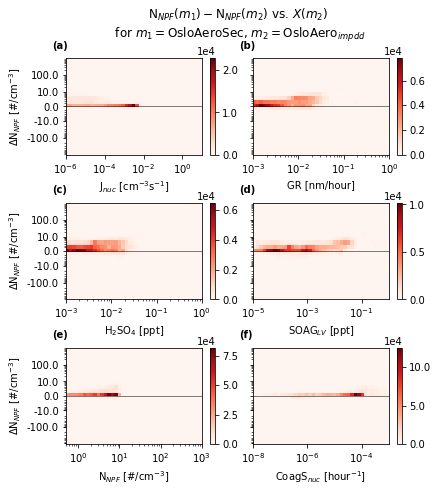

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_noSECTv21_ox_ricc_dd_SECTv21_ctrl.


In [99]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=850.
_ds = ds_diff.where(mask_)#sel(lev=slice(lev_min, None))
var_diff = 'NCONC01'
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[5e-1,1e3],
    'COAGNUCL':[1e-8,1e-3],
}

_plt_tmp(_ds,axs,var_xl, var_diff, xlims)
fn = plot_path + f'2dhist_{case_orig}_{case_sec}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

In [100]:
v= 'logNCONC01_noSECTv21_ox_ricc_dd'
mask_ = (ds_diff[v] >ds_diff[v].quantile(.25))&(ds_diff[v] <ds_diff[v].quantile(.50))
#v= 'NCONC01_noSECTv21_ox_ricc_dd'
#mask_ = mask_ & (ds_diff[v] >10)#ds_diff[v].quantile(.1))

NUCLRATE
GR
H2SO4
SOA_LV
NCONC01
COAGNUCL


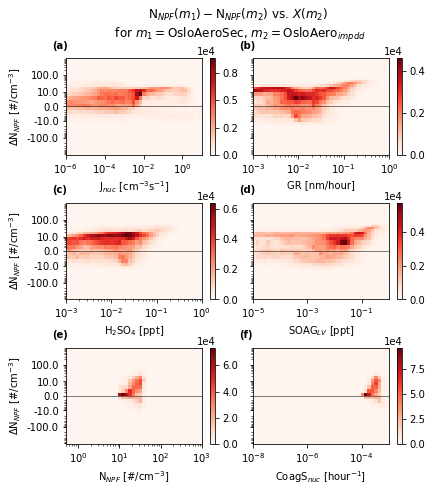

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_noSECTv21_ox_ricc_dd_SECTv21_ctrl.


In [101]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=850.
_ds = ds_diff.where(mask_)#sel(lev=slice(lev_min, None))
var_diff = 'NCONC01'
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[5e-1,1e3],
    'COAGNUCL':[1e-8,1e-3],
}

_plt_tmp(_ds,axs,var_xl, var_diff, xlims)
fn = plot_path + f'2dhist_{case_orig}_{case_sec}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

In [102]:
v= 'logNCONC01_noSECTv21_ox_ricc_dd'
mask_ = (ds_diff[v] >ds_diff[v].quantile(.50))&(ds_diff[v] <ds_diff[v].quantile(.75))
#v= 'NCONC01_noSECTv21_ox_ricc_dd'
#mask_ = mask_ & (ds_diff[v] >10)#ds_diff[v].quantile(.1))

NUCLRATE
GR
H2SO4
SOA_LV
NCONC01
COAGNUCL


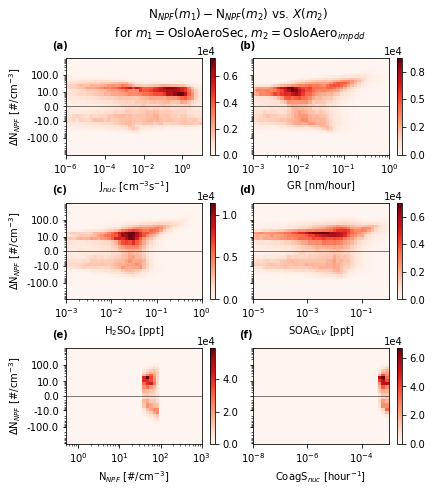

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_noSECTv21_ox_ricc_dd_SECTv21_ctrl.


In [103]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=850.
_ds = ds_diff.where(mask_)#sel(lev=slice(lev_min, None))
var_diff = 'NCONC01'
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[5e-1,1e3],
    'COAGNUCL':[1e-8,1e-3],
}

_plt_tmp(_ds,axs,var_xl, var_diff, xlims)
fn = plot_path + f'2dhist_{case_orig}_{case_sec}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

In [104]:
v= 'logNCONC01_noSECTv21_ox_ricc_dd'
mask_ = (ds_diff[v] >ds_diff[v].quantile(.75))#&(ds_diff[v] <ds_diff[v].quantile(.75))
#v= 'NCONC01_noSECTv21_ox_ricc_dd'
#mask_ = mask_ & (ds_diff[v] >10)#ds_diff[v].quantile(.1))

NUCLRATE
GR
H2SO4
SOA_LV
NCONC01
COAGNUCL


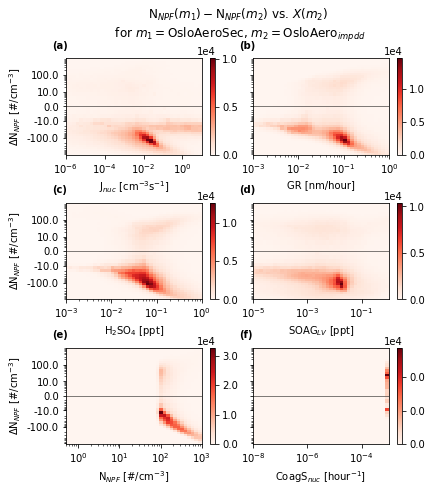

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_noSECTv21_ox_ricc_dd_SECTv21_ctrl.


In [105]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=850.
_ds = ds_diff.where(mask_)#sel(lev=slice(lev_min, None))
var_diff = 'NCONC01'
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[5e-1,1e3],
    'COAGNUCL':[1e-8,1e-3],
}

_plt_tmp(_ds,axs,var_xl, var_diff, xlims)
fn = plot_path + f'2dhist_{case_orig}_{case_sec}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

NUCLRATE
GR
H2SO4
SOA_LV
N_AER
COAGNUCL


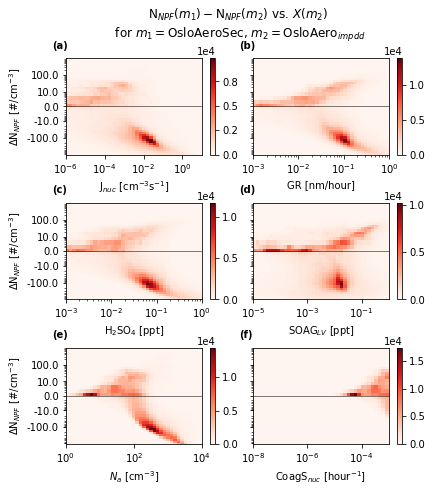

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_noSECTv21_ox_ricc_dd_SECTv21_ctrl.


In [106]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','N_AER','COAGNUCL']
lev_min=800.
_ds = ds_diff.sel(lev=slice(lev_min, None))
var_diff = 'NCONC01'
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[5e-1,1e3],
    'COAGNUCL':[1e-8,1e-3],
}
for var,ax in zip(var_xl, axs.flatten()):
    print(var)
    xlim = xlims[var]
    h = _plt_2dhist(_ds,f'{var}_{case_orig}', var_diff,
                nr_bins=40,
                xlim=xlim, ax=ax)
    uni = var_info.get_fancy_unit_xr(_ds[var],
                                     var)
    ax.set_xlabel(f'{get_fancy_var_name(var)} [{uni}]')
    ax.plot(xlim,[0,0], linewidth=.5, c='k')

uni = var_info.get_fancy_unit_xr(_ds[var_diff],
                           var_diff)
fvar_diff = get_fancy_var_name(var_diff)
ylab = f'$\Delta${fvar_diff} [{uni}]'
for ax in axs[:,0]:
    ax.set_ylabel(ylab)
    
subp_insert_abc(axs)

suptit =f'{get_nice_name_case(case_sec)}-{get_nice_name_case(case_orig)} vs.  '
suptit =f'{fvar_diff}$(m_1)-${fvar_diff}$(m_2)$ vs. $X(m_2)$ \n for $m_1=${get_nice_name_case(case_sec)}, $m_2=${get_nice_name_case(case_orig)}'
fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
stit = fig.suptitle(suptit,  fontsize=12, y=.98)
fn = plot_path + f'2dhist_{case_orig}_{case_sec}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

NUCLRATE
GR
H2SO4
SOA_LV
NCONC01
COAGNUCL


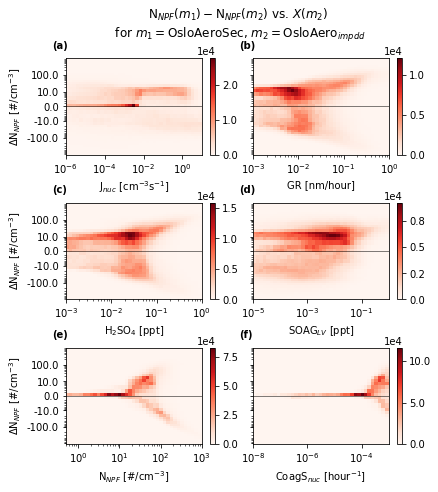

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_noSECTv21_ox_ricc_dd_SECTv21_ctrl.


In [107]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=800.
_ds = ds_diff.sel(lev=slice( None,lev_min))
var_diff = 'NCONC01'
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[5e-1,1e3],
    'COAGNUCL':[1e-8,1e-3],
}
for var,ax in zip(var_xl, axs.flatten()):
    print(var)
    xlim = xlims[var]
    h = _plt_2dhist(_ds,f'{var}_{case_orig}', var_diff,
                nr_bins=40,
                xlim=xlim, ax=ax)
    uni = var_info.get_fancy_unit_xr(_ds[var],
                                     var)
    ax.set_xlabel(f'{get_fancy_var_name(var)} [{uni}]')
    ax.plot(xlim,[0,0], linewidth=.5, c='k')

uni = var_info.get_fancy_unit_xr(_ds[var_diff],
                           var_diff)
fvar_diff = get_fancy_var_name(var_diff)
ylab = f'$\Delta${fvar_diff} [{uni}]'
for ax in axs[:,0]:
    ax.set_ylabel(ylab)
    
subp_insert_abc(axs)

suptit =f'{get_nice_name_case(case_sec)}-{get_nice_name_case(case_orig)} vs.  '
suptit =f'{fvar_diff}$(m_1)-${fvar_diff}$(m_2)$ vs. $X(m_2)$ \n for $m_1=${get_nice_name_case(case_sec)}, $m_2=${get_nice_name_case(case_orig)}'
fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
stit = fig.suptitle(suptit,  fontsize=12, y=.98)
fn = plot_path + f'2dhist_{case_orig}_{case_sec}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

NUCLRATE
GR
H2SO4
SOA_LV
NCONC01
COAGNUCL


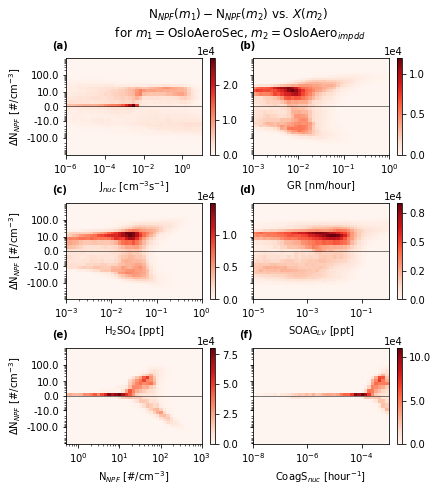

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_noSECTv21_ox_ricc_dd_SECTv21_ctrl.


In [108]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=600.
_ds = ds_diff.sel(lev=slice( None,lev_min))
var_diff = 'NCONC01'
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[5e-1,1e3],
    'COAGNUCL':[1e-8,1e-3],
}
for var,ax in zip(var_xl, axs.flatten()):
    print(var)
    xlim = xlims[var]
    h = _plt_2dhist(_ds,f'{var}_{case_orig}', var_diff,
                nr_bins=40,
                xlim=xlim, ax=ax)
    uni = var_info.get_fancy_unit_xr(_ds[var],
                                     var)
    ax.set_xlabel(f'{get_fancy_var_name(var)} [{uni}]')
    ax.plot(xlim,[0,0], linewidth=.5, c='k')

uni = var_info.get_fancy_unit_xr(_ds[var_diff],
                           var_diff)
fvar_diff = get_fancy_var_name(var_diff)
ylab = f'$\Delta${fvar_diff} [{uni}]'
for ax in axs[:,0]:
    ax.set_ylabel(ylab)
    
subp_insert_abc(axs)

suptit =f'{get_nice_name_case(case_sec)}-{get_nice_name_case(case_orig)} vs.  '
suptit =f'{fvar_diff}$(m_1)-${fvar_diff}$(m_2)$ vs. $X(m_2)$ \n for $m_1=${get_nice_name_case(case_sec)}, $m_2=${get_nice_name_case(case_orig)}'
fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
stit = fig.suptitle(suptit,  fontsize=12, y=.98)
fn = plot_path + f'2dhist_{case_orig}_{case_sec}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

In [109]:
import seaborn as sns

NUCLRATE
GR
H2SO4
SOA_LV
N_AER
COAGNUCL


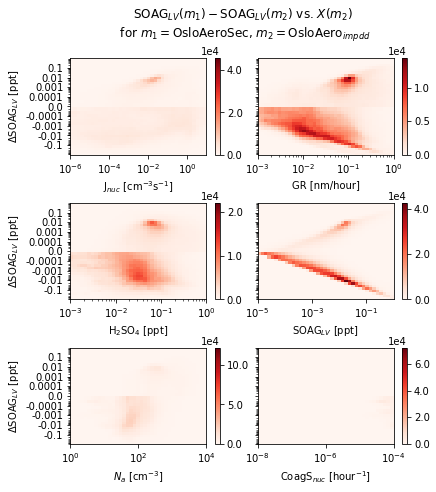

In [110]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','N_AER','COAGNUCL']
lev_min=900
_ds = ds_diff#.sel(lev=slice( lev_min,None))
var_diff = 'SOA_LV'
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[1e0,1e4],
    'COAGNUCL':[1e-8,1e-4],
}
for var,ax in zip(var_xl, axs.flatten()):
    print(var)
    xlim = xlims[var]
    _plt_2dhist(_ds,f'{var}_{case_orig}', var_diff,
                nr_bins=40,
                xlim=xlim, ax=ax, ylim=xlims[var_diff])
    uni = var_info.get_fancy_unit_xr(_ds[var],
                                     var)
    ax.set_xlabel(f'{get_fancy_var_name(var)} [{uni}]')

uni = var_info.get_fancy_unit_xr(_ds[var_diff],
                           var_diff)
fvar_diff = get_fancy_var_name(var_diff)
ylab = f'$\Delta${fvar_diff} [{uni}]'
for ax in axs[:,0]:
    ax.set_ylabel(ylab)
suptit =f'{get_nice_name_case(case_sec)}-{get_nice_name_case(case_orig)} vs.  '
suptit =f'{fvar_diff}$(m_1)-${fvar_diff}$(m_2)$ vs. $X(m_2)$ \n for $m_1=${get_nice_name_case(case_sec)}, $m_2=${get_nice_name_case(case_orig)}'
fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
stit = fig.suptitle(suptit,  fontsize=12, y=.98)
fn = plot_path + f'2dhist_{case_orig}_{case_sec}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()

NUCLRATE
GR
H2SO4
SOA_LV
N_AER
COAGNUCL


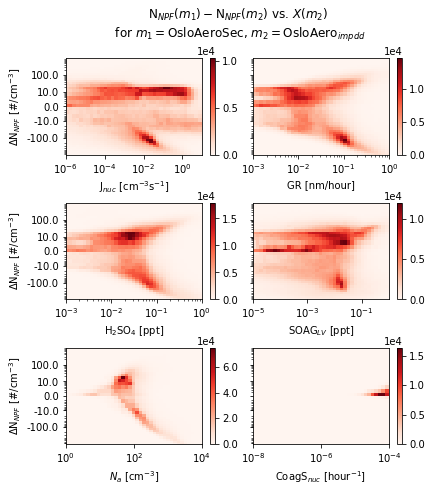

In [111]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','N_AER','COAGNUCL']
lev_min=100.
_ds = ds_diff.sel(lev=slice(lev_min, None))
var_diff = 'NCONC01'
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[1e0,1e4],
    'COAGNUCL':[1e-8,1e-4],
}
for var,ax in zip(var_xl, axs.flatten()):
    print(var)
    xlim = xlims[var]
    _plt_2dhist(_ds,f'{var}_{case_orig}', var_diff,
                nr_bins=40,
                xlim=xlim, ax=ax)
    uni = var_info.get_fancy_unit_xr(_ds[var],
                                     var)
    ax.set_xlabel(f'{get_fancy_var_name(var)} [{uni}]')

uni = var_info.get_fancy_unit_xr(_ds[var_diff],
                           var_diff)
fvar_diff = get_fancy_var_name(var_diff)
ylab = f'$\Delta${fvar_diff} [{uni}]'
for ax in axs[:,0]:
    ax.set_ylabel(ylab)
suptit =f'{get_nice_name_case(case_sec)}-{get_nice_name_case(case_orig)} vs.  '
suptit =f'{fvar_diff}$(m_1)-${fvar_diff}$(m_2)$ vs. $X(m_2)$ \n for $m_1=${get_nice_name_case(case_sec)}, $m_2=${get_nice_name_case(case_orig)}'
fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
stit = fig.suptitle(suptit,  fontsize=12, y=.98)
fn = plot_path + f'2dhist_{case_orig}_{case_sec}.'
fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()

In [ ]:
_ds

In [112]:
import seaborn as sns

<xarray.DataArray 'NCONC01' (N_AER: 15, GR: 15)>
array([[1.85949039e+00, 1.86637783e+00, 1.88714683e+00, 1.88208723e+00,
        1.95217562e+00,            nan,            nan, 3.06694061e-01,
        2.27449790e-01, 2.05647990e-01, 6.01707637e-01, 5.61531961e-01,
        4.93683487e-01, 1.18993163e+00,            nan],
       [2.75408101e+00, 2.73801064e+00, 2.73350406e+00, 2.70943594e+00,
        2.98017836e+00,            nan, 4.80662763e-01, 4.66690361e-01,
        3.44892025e-01, 3.56286854e-01, 8.68988276e-01, 7.63964117e-01,
        7.79801965e-01, 1.46595526e+00,            nan],
       [3.97306705e+00, 4.05639839e+00, 4.09769678e+00, 4.01001835e+00,
        3.98143721e+00, 4.63205338e+00, 5.73887765e-01, 7.78346360e-01,
        6.15094125e-01, 6.20607316e-01, 1.04381895e+00, 9.92158532e-01,
        1.53609276e+00, 1.85543835e+00, 2.82369757e+00],
       [5.43818760e+00, 5.63054276e+00, 5.92458344e+00, 5.96377468e+00,
        5.82099485e+00, 5.73147774e+00, 9.97450411e-01, 1.13

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


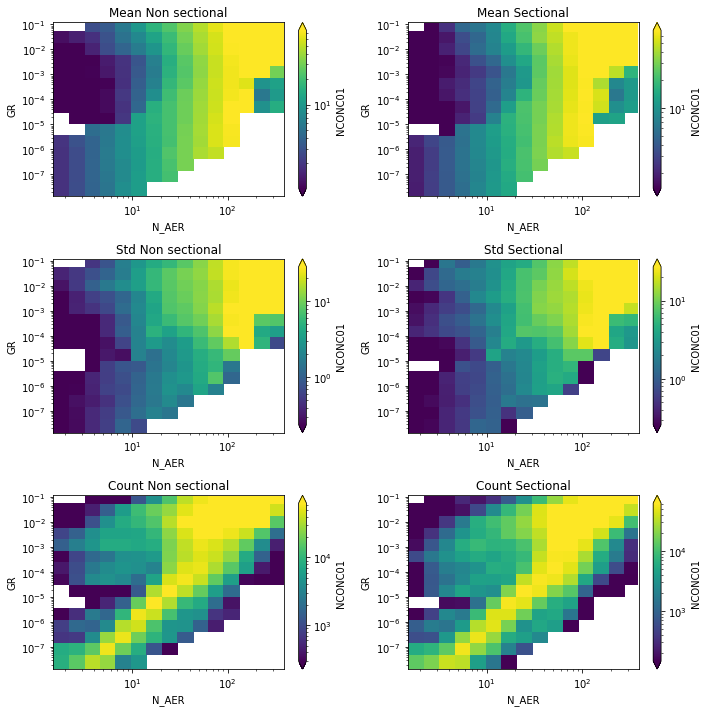

In [113]:
import importlib as il
from useful_scit.util import conditional_stats
il.reload(conditional_stats)
varList = ['H2SO4','SOA_LV','NCONC01']
varList = ['N_AER','GR','NCONC01']
sec_sub = cases_dic[case_sec][varList].stack(ind=('lat','lon','lev','time'))#
#sec_sub = sec_sub
nosec_sub = cases_dic[case_orig][varList].stack(ind=('lat','lon','lev','time'))
fig, axs = plt.subplots(3,2, figsize=[10,10])
axs=axs.flatten()
df, pl_xr_ns,  kwargs, xedges, yedges = conditional_stats.plot_cond_statistic(nosec_sub,varList,axs[0],quant=0.1,scale='log', stat='mean',  plt_title='Mean Non sectional', cscale='log')
df, pl_xr_s,  kwargs, xedges, yedges = conditional_stats.plot_cond_statistic(sec_sub,  varList,axs[1],quant=0.1,scale='log', stat='mean',  plt_title='Mean Sectional',     cscale='log', xedges=xedges, yedges=yedges)
conditional_stats.plot_cond_statistic(nosec_sub,varList,axs[2],quant=0.1,scale='log', stat='std',   plt_title='Std Non sectional',  cscale='log', xedges=xedges, yedges=yedges)
conditional_stats.plot_cond_statistic(sec_sub,  varList,axs[3],quant=0.1,scale='log', stat='std',   plt_title='Std Sectional',      cscale='log', xedges=xedges, yedges=yedges)
df, pl_xr_ns_c,  kwargs, xedges, yedges =conditional_stats.plot_cond_statistic(nosec_sub,varList,axs[4],quant=0.1,scale='log', stat='count', plt_title='Count Non sectional',cscale='log', xedges=xedges, yedges=yedges)
df, pl_xr_s_c,  kwargs, xedges, yedges =conditional_stats.plot_cond_statistic(sec_sub,  varList,axs[5],quant=0.1,scale='log', stat='count', plt_title='Count Sectional',    cscale='log', xedges=xedges, yedges=yedges)

plt.tight_layout()
plt.show()
#pl_xr_ns

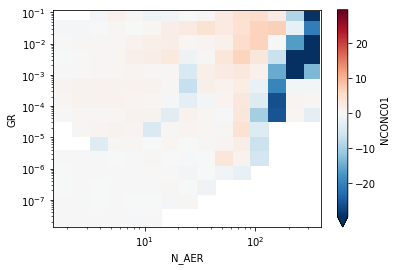

In [114]:
(pl_xr_s -pl_xr_ns).plot(x=varList[0],y=varList[1],xlim=kwargs['xlim'], robust=True,
                         ylim=kwargs['ylim'], yscale='log',xscale='log')

plt.show()

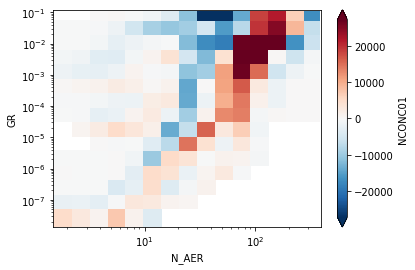

In [115]:
(pl_xr_s_c -pl_xr_ns_c).plot(x=varList[0],y=varList[1],xlim=kwargs['xlim'], robust=True,
                         ylim=kwargs['ylim'], yscale='log',xscale='log')

plt.show()

<xarray.DataArray 'NCONC01' (GR: 15, COAGNUCL: 15)>
array([[  1.8431938 ,   2.714751  ,   3.8944764 ,   5.311358  ,
          7.659269  ,  10.77448   ,  13.654125  ,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan],
       [  1.8550084 ,   2.7027502 ,   3.9553123 ,   5.5288    ,
          7.498705  ,  10.462562  ,  14.073809  ,  19.522156  ,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan],
       [  1.8761476 ,   2.6859243 ,   4.038336  ,   5.8122487 ,
          7.720828  ,  10.228143  ,  14.7857    ,  21.282688  ,
         31.234627  ,  35.3024    ,          nan,          nan,
                 nan,          nan,          nan],
       [  1.8527166 ,   2.6871438 ,   3.9491792 ,   5.745294  ,
          8.185803  ,  10.62794   ,  14.562474  ,  22.176165  ,
         30.933296  ,  43.284397  ,  51.20677   ,          nan,
                 nan,      

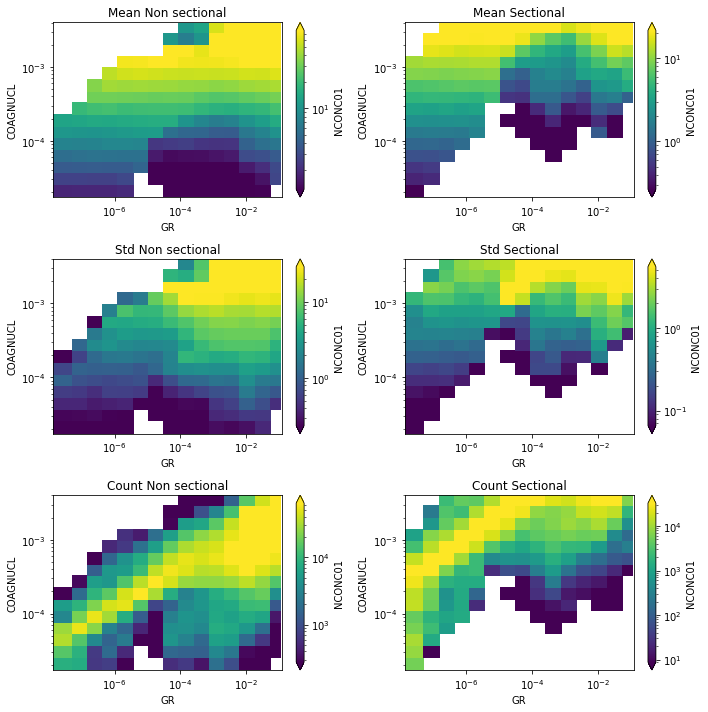

In [116]:
import importlib as il
from useful_scit.util import conditional_stats
il.reload(conditional_stats)
varList = ['H2SO4','SOA_LV','NCONC01']
varList = ['GR','COAGNUCL','NCONC01']
sec_sub = cases_dic[case_sec][varList].stack(ind=('lat','lon','lev','time'))#
#sec_sub = sec_sub
nosec_sub = cases_dic[case_orig][varList].stack(ind=('lat','lon','lev','time'))
fig, axs = plt.subplots(3,2, figsize=[10,10])
axs=axs.flatten()
df, pl_xr_ns,  kwargs, xedges, yedges = conditional_stats.plot_cond_statistic(nosec_sub,varList,axs[0],quant=0.1,scale='log', stat='mean',  plt_title='Mean Non sectional', cscale='log')
df, pl_xr_s,  kwargs, xedges, yedges = conditional_stats.plot_cond_statistic(sec_sub,  varList,axs[1],quant=0.1,scale='log', stat='mean',  plt_title='Mean Sectional',     cscale='log', xedges=xedges, yedges=yedges)
conditional_stats.plot_cond_statistic(nosec_sub,varList,axs[2],quant=0.1,scale='log', stat='std',   plt_title='Std Non sectional',  cscale='log', xedges=xedges, yedges=yedges)
conditional_stats.plot_cond_statistic(sec_sub,  varList,axs[3],quant=0.1,scale='log', stat='std',   plt_title='Std Sectional',      cscale='log', xedges=xedges, yedges=yedges)
df, pl_xr_ns_c,  kwargs, xedges, yedges =conditional_stats.plot_cond_statistic(nosec_sub,varList,axs[4],quant=0.1,scale='log', stat='count', plt_title='Count Non sectional',cscale='log', xedges=xedges, yedges=yedges)
df, pl_xr_s_c,  kwargs, xedges, yedges =conditional_stats.plot_cond_statistic(sec_sub,  varList,axs[5],quant=0.1,scale='log', stat='count', plt_title='Count Sectional',    cscale='log', xedges=xedges, yedges=yedges)

plt.tight_layout()
plt.show()
#pl_xr_ns

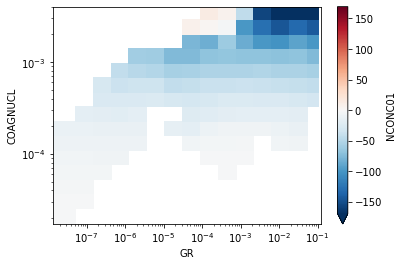

In [117]:
(pl_xr_s -pl_xr_ns).plot(x=varList[0],y=varList[1],xlim=kwargs['xlim'], robust=True,
                         ylim=kwargs['ylim'], yscale='log',xscale='log')

plt.show()

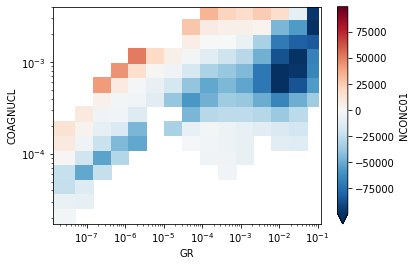

In [118]:
(pl_xr_s_c -pl_xr_ns_c).plot(x=varList[0],y=varList[1],xlim=kwargs['xlim'], robust=True,
                         ylim=kwargs['ylim'], yscale='log',xscale='log')

plt.show()

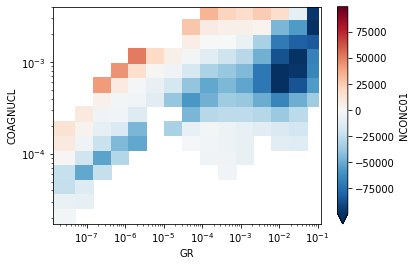

In [119]:
(pl_xr_s_c -pl_xr_ns_c).plot(x=varList[0],y=varList[1],xlim=kwargs['xlim'], robust=True,
                         ylim=kwargs['ylim'], yscale='log',xscale='log')

plt.show()

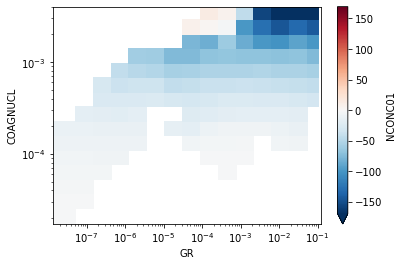

In [120]:
(pl_xr_s -pl_xr_ns).plot(x=varList[0],y=varList[1],xlim=kwargs['xlim'], robust=True,
                        ylim=kwargs['ylim'], yscale='log',xscale='log')

plt.show()

<xarray.DataArray 'NCONC01' (N_AER: 15, GR: 15)>
array([[  1.9350255 ,   1.9239151 ,   1.9482793 ,   2.020896  ,
          1.8744966 ,          nan,   0.5486771 ,   0.55904436,
          0.72595775,   1.0631486 ,   0.7223068 ,   0.5726727 ,
          0.72345877,   0.64912516,          nan],
       [  2.8208017 ,   2.798643  ,   2.796683  ,   2.7228742 ,
          2.9356298 ,          nan,   0.87628174,   0.77518773,
          1.1441265 ,   1.4062576 ,   1.0969023 ,   0.8909446 ,
          1.218958  ,   0.9233306 ,   0.95079476],
       [  3.9965134 ,   4.0634456 ,   4.1086745 ,   4.112969  ,
          3.94972   ,   4.463032  ,   1.3053799 ,   1.1382903 ,
          1.6334265 ,   1.8198045 ,   1.4948922 ,   1.400695  ,
          1.9298371 ,   1.635499  ,   2.2377849 ],
       [  5.5124784 ,   5.659045  ,   5.911546  ,   5.973686  ,
          5.730557  ,   5.7065606 ,   1.9560184 ,   1.8049163 ,
          2.2204285 ,   2.227358  ,   1.9810591 ,   2.024738  ,
          2.949265  ,   3.0601

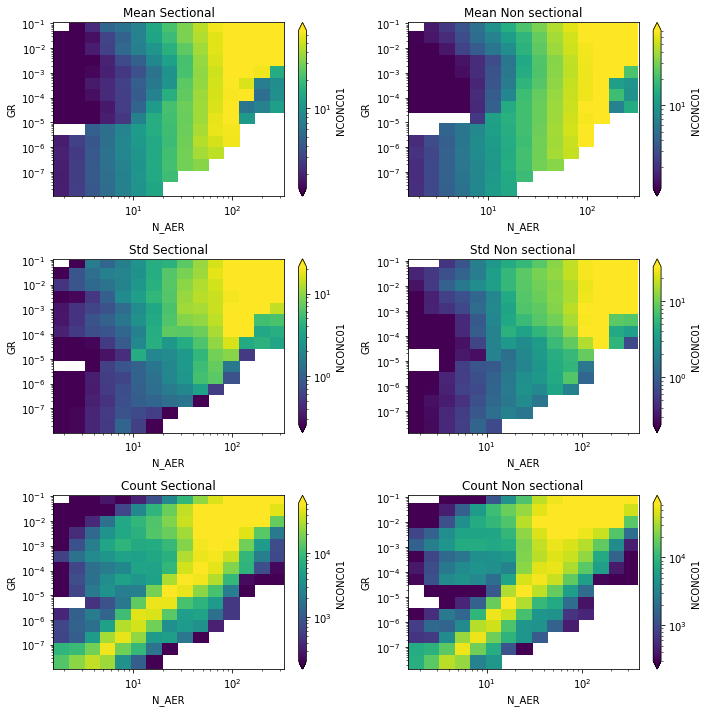

In [121]:
import importlib as il
from useful_scit.util import conditional_stats
il.reload(conditional_stats)
varList = ['N_AER','GR','NCONC01']
sec_sub = cases_dic[case_sec][varList].stack(ind=('lat','lon','lev','time'))#
#sec_sub = sec_sub
nosec_sub = cases_dic[case_orig][varList].stack(ind=('lat','lon','lev','time'))
fig, axs = plt.subplots(3,2, figsize=[10,10])
axs=axs.flatten()
df, pl_xr_s,  kwargs, xedges, yedges = conditional_stats.plot_cond_statistic(sec_sub,  varList,axs[0],quant=0.1,scale='log', stat='mean',  plt_title='Mean Sectional',     cscale='log')
df, pl_xr_ns,  kwargs, xedges, yedges = conditional_stats.plot_cond_statistic(nosec_sub,varList,axs[1],quant=0.1,scale='log', stat='mean',  plt_title='Mean Non sectional', cscale='log', xedges=xedges, yedges=yedges)
conditional_stats.plot_cond_statistic(sec_sub,  varList,axs[2],quant=0.1,scale='log', stat='std',   plt_title='Std Sectional',      cscale='log')
conditional_stats.plot_cond_statistic(nosec_sub,varList,axs[3],quant=0.1,scale='log', stat='std',   plt_title='Std Non sectional',  cscale='log')
conditional_stats.plot_cond_statistic(sec_sub,  varList,axs[4],quant=0.1,scale='log', stat='count', plt_title='Count Sectional',    cscale='log')
conditional_stats.plot_cond_statistic(nosec_sub,varList,axs[5],quant=0.1,scale='log', stat='count', plt_title='Count Non sectional',cscale='log')
plt.tight_layout()
plt.show()
#pl_xr_ns

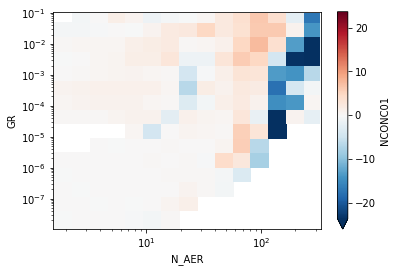

In [122]:
(pl_xr_s -pl_xr_ns).plot(x=varList[0],y=varList[1],xlim=kwargs['xlim'], robust=True,
                         ylim=kwargs['ylim'], yscale='log',xscale='log')

plt.show()

<xarray.DataArray 'H2SO4' (N_AER: 15, NCONC01: 15)>
array([[1.6942530e-06, 7.4553458e-07,           nan,           nan,
                  nan,           nan,           nan,           nan,
                  nan,           nan,           nan,           nan,
                  nan,           nan,           nan],
       [3.0200212e-04, 5.3547042e-06, 1.6097306e-06,           nan,
                  nan,           nan,           nan,           nan,
                  nan,           nan,           nan,           nan,
                  nan,           nan,           nan],
       [1.3171727e-03, 7.2734611e-04, 2.7780075e-05, 3.7218476e-06,
                  nan,           nan,           nan,           nan,
                  nan,           nan,           nan,           nan,
                  nan,           nan,           nan],
       [1.0700459e-03, 1.2836910e-03, 1.2269786e-03, 1.2541816e-04,
        8.1971502e-06,           nan,           nan,           nan,
                  nan,           nan, 

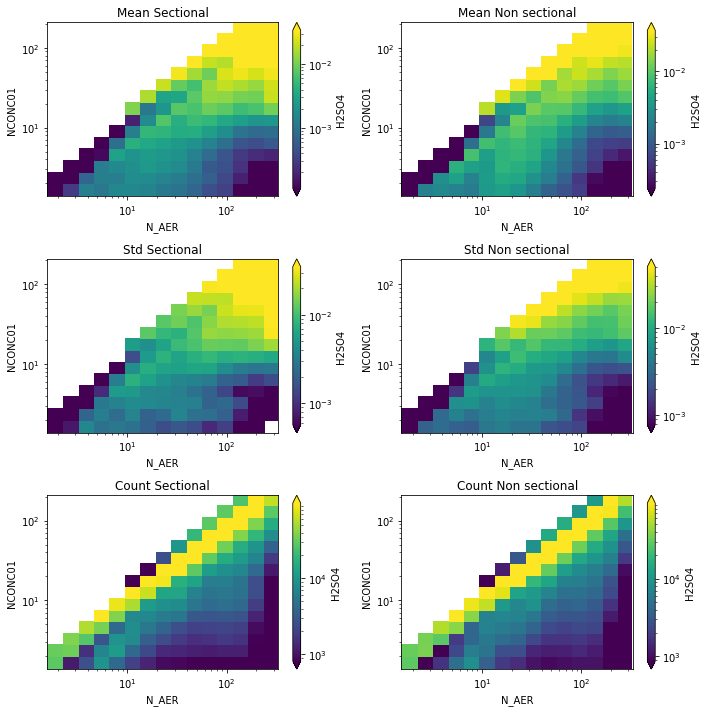

In [123]:
import importlib as il
from useful_scit.util import conditional_stats
il.reload(conditional_stats)
varList = ['N_AER','NCONC01','H2SO4']
sec_sub = cases_dic[case_sec][varList].stack(ind=('lat','lon','lev','time'))#
#sec_sub = sec_sub
nosec_sub = cases_dic[case_orig][varList].stack(ind=('lat','lon','lev','time'))
fig, axs = plt.subplots(3,2, figsize=[10,10])
axs=axs.flatten()
df, pl_xr_s,  kwargs, xedges, yedges = conditional_stats.plot_cond_statistic(sec_sub,  varList,axs[0],quant=0.1,scale='log', stat='mean',  plt_title='Mean Sectional',     cscale='log')
df, pl_xr_ns,  kwargs, xedges, yedges = conditional_stats.plot_cond_statistic(nosec_sub,varList,axs[1],quant=0.1,scale='log', stat='mean',  plt_title='Mean Non sectional', cscale='log', xedges=xedges, yedges=yedges)
conditional_stats.plot_cond_statistic(sec_sub,  varList,axs[2],quant=0.1,scale='log', stat='std',   plt_title='Std Sectional',      cscale='log', xedges=xedges, yedges=yedges)
conditional_stats.plot_cond_statistic(nosec_sub,varList,axs[3],quant=0.1,scale='log', stat='std',   plt_title='Std Non sectional',  cscale='log', xedges=xedges, yedges=yedges)
df, pl_xr_s_c,  kwargs, xedges, yedges =conditional_stats.plot_cond_statistic(sec_sub,  varList,axs[4],quant=0.1,scale='log', stat='count', plt_title='Count Sectional',    cscale='log', xedges=xedges, yedges=yedges)
df, pl_xr_ns_c,  kwargs, xedges, yedges =conditional_stats.plot_cond_statistic(nosec_sub,varList,axs[5],quant=0.1,scale='log', stat='count', plt_title='Count Non sectional',cscale='log', xedges=xedges, yedges=yedges)
plt.tight_layout()
plt.show()
#pl_xr_ns

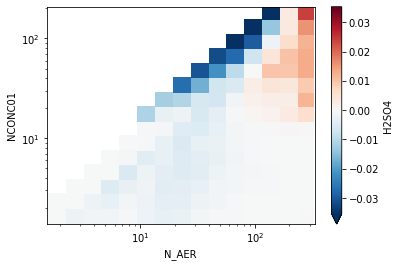

In [124]:
(pl_xr_s -pl_xr_ns).plot(x=varList[0],y=varList[1],xlim=kwargs['xlim'], robust=True,
                         ylim=kwargs['ylim'], yscale='log',xscale='log')

plt.show()

In [125]:
for case in cases:
    _ds = cases_dic[case]
    _ds['N_nt01'] = _ds['N_AER']-_ds['NCONC01']
    _ds['N_nt01'] = _ds['N_nt01'].where(_ds['N_nt01']>0)

<xarray.DataArray 'SOA_LV' (H2SO4: 15, NCONC01: 15)>
array([[3.67415042e-14, 4.75233121e-14, 3.86848858e-14, 1.25983039e-14,
        9.53281203e-15, 6.51116530e-14, 8.91729385e-14, 7.81975016e-13,
        1.44423015e-12, 3.32727444e-12,            nan,            nan,
                   nan,            nan,            nan],
       [7.65696642e-14, 1.16766568e-13, 2.98781302e-08, 8.62128362e-14,
        3.93959022e-14, 9.74889318e-14, 2.03405123e-13, 3.92476936e-12,
        2.57405503e-11, 1.57191149e-10, 3.49826335e-10,            nan,
                   nan,            nan,            nan],
       [3.86753709e-06, 5.59245700e-06, 3.98537850e-06, 5.02344506e-07,
        3.72927929e-08, 1.52693721e-13, 4.21906813e-13, 4.87358027e-12,
        7.34429531e-11, 4.96295893e-10, 3.35082895e-09, 1.49652096e-10,
                   nan,            nan,            nan],
       [2.23240149e-05, 3.64559528e-05, 3.96348805e-05, 1.48849167e-05,
        4.88492424e-06, 1.48495998e-08, 1.80864046e-09, 

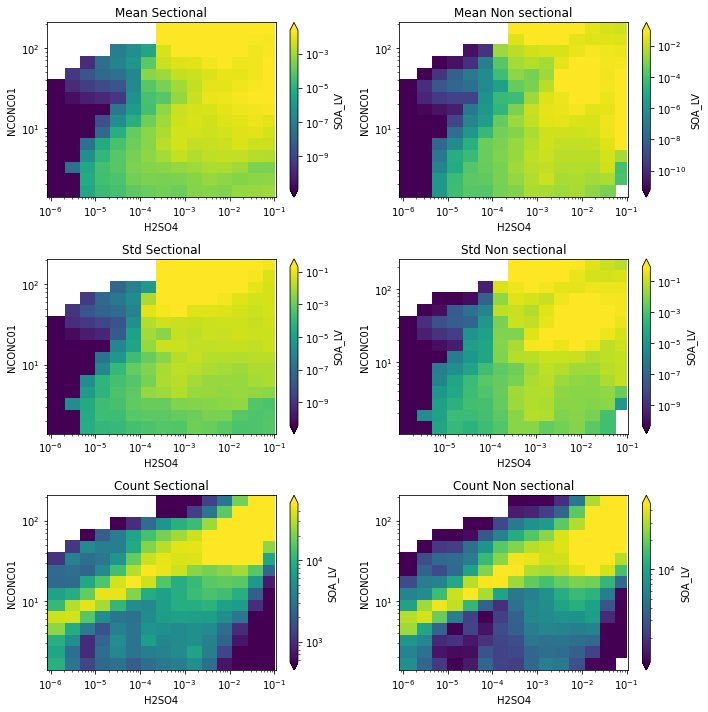

In [126]:
import importlib as il
from useful_scit.util import conditional_stats
il.reload(conditional_stats)
varList = ['H2SO4','NCONC01','SOA_LV']
sec_sub = cases_dic[case_sec][varList].stack(ind=('lat','lon','lev','time'))#
#sec_sub = sec_sub
nosec_sub = cases_dic[case_orig][varList].stack(ind=('lat','lon','lev','time'))
fig, axs = plt.subplots(3,2, figsize=[10,10])
axs=axs.flatten()
df, pl_xr_s,  kwargs, xedges, yedges = conditional_stats.plot_cond_statistic(sec_sub,  varList,axs[0],quant=0.1,scale='log', stat='mean',  plt_title='Mean Sectional',     cscale='log')
df, pl_xr_ns,  kwargs, xedges, yedges = conditional_stats.plot_cond_statistic(nosec_sub,varList,axs[1],quant=0.1,scale='log', stat='mean',  plt_title='Mean Non sectional', cscale='log', xedges=xedges, yedges=yedges)
conditional_stats.plot_cond_statistic(sec_sub,  varList,axs[2],quant=0.1,scale='log', stat='std',   plt_title='Std Sectional',      cscale='log')
conditional_stats.plot_cond_statistic(nosec_sub,varList,axs[3],quant=0.1,scale='log', stat='std',   plt_title='Std Non sectional',  cscale='log')
df, pl_xr_s_c,  kwargs, xedges, yedges = conditional_stats.plot_cond_statistic(sec_sub,  varList,axs[4],quant=0.1,scale='log', stat='count', plt_title='Count Sectional',    cscale='log')
df, pl_xr_ns_c,  kwargs, xedges, yedges = conditional_stats.plot_cond_statistic(nosec_sub,varList,axs[5],quant=0.1,scale='log', stat='count', plt_title='Count Non sectional',cscale='log', xedges=xedges, yedges=yedges)
plt.tight_layout()
plt.show()
#pl_xr_ns

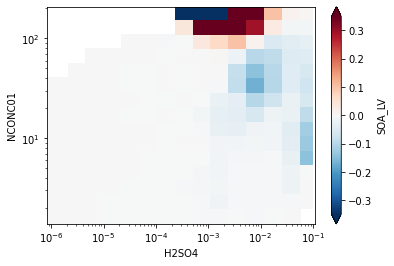

In [127]:
from useful_scit.util.zarray import corr
(pl_xr_s -pl_xr_ns).plot(x=varList[0],y=varList[1],xlim=kwargs['xlim'], robust=True,
                         ylim=kwargs['ylim'], yscale='log',xscale='log')

plt.show()

/persistent01/packages/useful-scit/useful_scit/util/conditional_stats.py:129: RuntimeWarning: divide by zero encountered in log10
  xedges = np.logspace(np.log10(xr_ds[x].compute().quantile(quant).values),
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/function_base.py:159: RuntimeWarning: invalid value encountered in multiply
  y *= step
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start


<xarray.DataArray 'NCONC01' (N_nt01: 15, NUCLRATE: 1991487)>
array([[ 27.476017,        nan,        nan, ...,        nan,        nan,
               nan],
       [ 33.822037,        nan,        nan, ...,        nan,        nan,
               nan],
       [ 37.6764  ,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [180.43834 ,        nan,        nan, ...,        nan,  80.34763 ,
               nan],
       [190.52148 ,        nan,        nan, ...,        nan,        nan,
               nan],
       [199.41997 ,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * N_nt01    (N_nt01) float64 1.462 2.031 2.821 3.919 ... 75.47 104.8 145.6
  * NUCLRATE  (NUCLRATE) float64 0.0 3.168e-18 6.032e-18 ... 0.2335 0.2338


ValueError: The input coordinate is not sorted in increasing order along axis 0. This can lead to unexpected results. Consider calling the `sortby` method on the input DataArray. To plot data with categorical axes, consider using the `heatmap` function from the `seaborn` statistical plotting library.

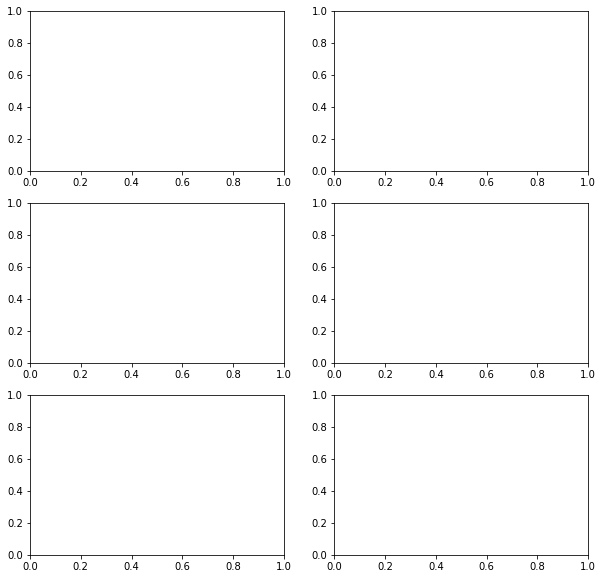

In [128]:
import importlib as il
from useful_scit.util import conditional_stats
il.reload(conditional_stats)
varList = ['N_nt01','NUCLRATE','NCONC01']
sec_sub = cases_dic[case_sec][varList].stack(ind=('lat','lon','lev','time'))#
#sec_sub = sec_sub
nosec_sub = cases_dic[case_orig][varList].stack(ind=('lat','lon','lev','time'))
fig, axs = plt.subplots(3,2, figsize=[10,10])
axs=axs.flatten()
df, pl_xr_s,  kwargs, xedges, yedges = conditional_stats.plot_cond_statistic(sec_sub,  varList,axs[0],quant=0.1,scale='log', stat='mean',  plt_title='Mean Sectional',     cscale='log')
df, pl_xr_ns,  kwargs, xedges, yedges = conditional_stats.plot_cond_statistic(nosec_sub,varList,axs[1],quant=0.1,scale='log', stat='mean',  plt_title='Mean Non sectional', cscale='log', xedges=xedges, yedges=yedges)
conditional_stats.plot_cond_statistic(sec_sub,  varList,axs[2],quant=0.1,scale='log', stat='std',   plt_title='Std Sectional',      cscale='log')
conditional_stats.plot_cond_statistic(nosec_sub,varList,axs[3],quant=0.1,scale='log', stat='std',   plt_title='Std Non sectional',  cscale='log')
conditional_stats.plot_cond_statistic(sec_sub,  varList,axs[4],quant=0.1,scale='log', stat='count', plt_title='Count Sectional',    cscale='log')
conditional_stats.plot_cond_statistic(nosec_sub,varList,axs[5],quant=0.1,scale='log', stat='count', plt_title='Count Non sectional',cscale='log')
plt.tight_layout()
plt.show()
#pl_xr_ns

In [ ]:
from useful_scit.util.zarray import corr
(pl_xr_s -pl_xr_ns).plot(x=varList[0],y=varList[1],xlim=kwargs['xlim'], robust=True,
                         ylim=kwargs['ylim'], yscale='log',xscale='log')

plt.show()

In [ ]:
import importlib as il
from useful_scit.util import conditional_stats
il.reload(conditional_stats)
varList = ['GR','NCONC01','NUCLRATE']
sec_sub = cases_dic[case_sec][varList].stack(ind=('lat','lon','lev','time'))#
#sec_sub = sec_sub
nosec_sub = cases_dic[case_orig][varList].stack(ind=('lat','lon','lev','time'))
fig, axs = plt.subplots(3,2, figsize=[10,10])
axs=axs.flatten()
df, pl_xr_s,  kwargs, xedges, yedges = conditional_stats.plot_cond_statistic(sec_sub,  varList,axs[0],quant=0.1,scale='log', stat='mean',  plt_title='Mean Sectional',     cscale='log')
df, pl_xr_ns,  kwargs, xedges, yedges = conditional_stats.plot_cond_statistic(nosec_sub,varList,axs[1],quant=0.1,scale='log', stat='mean',  plt_title='Mean Non sectional', cscale='log', xedges=xedges, yedges=yedges)
conditional_stats.plot_cond_statistic(sec_sub,  varList,axs[2],quant=0.1,scale='log', stat='std',   plt_title='Std Sectional',      cscale='log')
conditional_stats.plot_cond_statistic(nosec_sub,varList,axs[3],quant=0.1,scale='log', stat='std',   plt_title='Std Non sectional',  cscale='log')
conditional_stats.plot_cond_statistic(sec_sub,  varList,axs[4],quant=0.1,scale='log', stat='count', plt_title='Count Sectional',    cscale='log')
conditional_stats.plot_cond_statistic(nosec_sub,varList,axs[5],quant=0.1,scale='log', stat='count', plt_title='Count Non sectional',cscale='log')
plt.tight_layout()
plt.show()
#pl_xr_ns

In [ ]:
from useful_scit.util.zarray import corr
(pl_xr_s -pl_xr_ns).plot(x=varList[0],y=varList[1],xlim=kwargs['xlim'], robust=True,
                         ylim=kwargs['ylim'], yscale='log',xscale='log')

plt.show()

In [ ]:
plt.figure()
pl_xr.plot(ylim=[1e-15,2e-2], yscale='log',xscale='log')
plt.show()

In [ ]:
import seaborn as sns
sec_sub
_df = sec_sub[['SOA_LV','H2SO4']].to_dataframe()
_df =_df[~_df['SOA_LV'].isnull()]
_df = _df[_df['SOA_LV']>0]

In [ ]:
sns.jointplot(x='SOA_LV',y='H2SO4',data=np.log10(_df), kind='kde')
plt.show()

In [ ]:
#q5 = ds_diff['logH2SO4'+'_'+ case_orig].quantile(.01)
#q95 = ds_diff['logH2SO4'+'_'+ case_orig].quantile(.99)

In [ ]:
ds_diff_m = ds_diff#.where(ds_diff['logH2SO4'+'_'+ case_orig]>q5).where( ds_diff['logH2SO4'+'_'+ case_orig]<q95)

In [ ]:

ds_diff_m = ds_diff_m.where(ds_diff_m['lev']>lev_lim)

In [ ]:

var = var1
ds_diff_m.mean('time').plot.scatter(y=(var), hue=(f'log{var2}_{case_orig}'), x=(f'log{var1}_{case_orig}'), alpha=0.3, cmap='viridis', robust=True)
#plt.plot([1e0,1e4],[1e0,1e4])
#plt.xscale('log')
#plt.yscale('log')
plt.show()

In [ ]:
var = var1
ds_diff_m.mean('time').plot.scatter(y=(var), hue=(f'log{var_subl[2]}_{case_orig}'), x=(f'log{var1}_{case_orig}'), alpha=0.3, cmap='viridis', robust=True)
#plt.plot([1e0,1e4],[1e0,1e4])
#plt.xscale('log')
#plt.yscale('log')
plt.show()

In [ ]:

var = 'N_AER'
ds_diff_m.mean('time').plot.scatter(x=(var+'_'+case_sec), y=(var +'_'+case_orig), hue=('logH2SO4'+'_'+case_orig), alpha=0.4)
plt.plot([1e0,1e4],[1e0,1e4])
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:

var = 'N_AER'
ds_diff_m.mean('time').plot.scatter(x=(var+'_'+case_sec), y=(var +'_'+case_orig), hue=(f'log{var_subl[2]}_{case_orig}'), alpha=0.4)
plt.plot([1e0,1e4],[1e0,1e4])
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
var = 'N_AER'
ds_diff_m.mean('time').plot.scatter(x=(f'{var}_{case_sec}'), y=(f'{var}_{case_orig}'), hue=(var), alpha=0.4)
plt.plot([1e0,1e4],[1e0,1e4])
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
var = 'N_AER'
var_hue = 'H2SO4'
ds_diff_m.mean('time').plot.scatter(x=(var+'_'+case_sec), y=(var +'_'+case_orig), hue=(f'log{var_hue}_{case_sec}'), alpha=0.4)
plt.plot([1e0,1e4],[1e0,1e4])
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
var = 'N_AER'
i_lo = 80
for i in np.arange(0,len(ds_diff_m['lat']),10):

    ds_diff_m.isel(lat=slice(i,i+10), lon=slice(i_lo,i_lo+10)).plot.scatter(x=(var), hue=(f'log{var}_{case_orig}'), y=(f'log{var_hue}_{case_sec}'), alpha=0.4, vmin=1)
    lo1=ds_diff_m['lon'][i_lo]
    lo2=ds_diff_m['lon'][i_lo+10]
    la1 = ds_diff_m['lat'][i]
    if i+10>=96:
        la2=ds_diff_m['lat'][-1]
    else:
        la2 =ds_diff_m['lat'][i+10]
    plt.title('Lat:%f-%f , lon: %f-%f'%(la1,la2, lo1,lo2))
    plt.show()

In [ ]:
from useful_scit.util.zarray import corr,cov
var = 'NCONC01'
var2='H2SO4'
co = cov(ds_diff_m[var]-ds_diff_m[var].mean(), ds_diff_m['log'+var+'_'+case_sec], dim='time')
for i in range(7):
    co.isel(lev=-i).plot(robust=True)
    plt.title('corr %s and %s'%(var,'logH2SO4'+'_'+case_sec))
    plt.show()

In [ ]:
from useful_scit.util.zarray import corr
co = corr(ds_diff_m[var], ds_diff_m[var+'_'+case_sec], dim='time')
for i in range(7):
    co.isel(lev=-i).plot()
    plt.title('corr %s and %s'%(var,var+'_'+case_sec))
    plt.show()

In [ ]:
plt.plot([1,2])
plt.show()

In [ ]:
_vars = [var1, var2]
for case in cases:
    _vars = _vars + [f'{var}_{case}' for var in var_subl]
    _vars = _vars + [f'log{var}_{case}' for var in var_subl]

In [ ]:
df = ds_diff_m[_vars].isel(lev=slice(-10,None)).to_dataframe()

In [ ]:
from useful_scit.imps import (sns)
df[f'log{var}_noSEC_gr'] = np.floor(df[f'log{var}_{case_orig}'])
df_ri = df.reset_index()

In [ ]:

#df_ri['NN_AER']=df_ri['N_AER']

In [ ]:
df_ri#['N_AER']

In [ ]:
res = df_ri.groupby(by=f'log{var1}_noSEC_gr')[var1].std()
res.name = 'STD'

import pandas as pd
merg = pd.merge(df_ri,res,right_on=f'log{var1}_noSEC_gr',left_on=f'log{var1}_noSEC_gr')
merg[f'{var1}_norm'] = merg[var1]/merg['STD']
_a = merg[f'log{var1}_noSEC_gr']
#_df=merg[(_a<=1) | (_a>=5)]
_df = merg

In [ ]:
merg[f'{var1}_norm'].describe()

In [ ]:
_df[f'log{var1}_noSEC_gr'].plot.hist(bins=20)
plt.show()

In [ ]:
#g = sns.relplot(y='N_AER',x='logH2SO4_SECTv11_ctrl', col='logN_AER_noSEC_gr', data=df, col_wrap=3,alpha=.3 )
g = sns.FacetGrid( col=f'log{var1}_noSEC_gr', data=_df, col_wrap=4)
def _f(x,y,color):
    plt.hexbin(x,y, gridsize=40, extent=[-16,-11.5,-4,4], cmap='Reds')
g.map(_f,f'log{var2}_'+case_sec,f'{var1}_norm')

plt.show()

In [ ]:

naer =_df['N_AER']
_df[f'log{var1}']=np.nan
_df[f'log{var1}'][naer>0] = np.log10(_df[naer>0][var1])
_df[f'log{var1}'][naer<0] = -np.log10(-_df[naer<0][var1])

In [ ]:
extent = {
    '0':[-15,-11.5, -5,5],
    '1':[-15,-11.5, -30,30],
    '2':[-15,-11.5, -300,300],
    '3':[-15,-11.5, -1000,1000],
}
fig, axs = plt.subplots(4, figsize=[4,10], sharex=True)
for ii,ax in zip(range(4), axs.flatten()):
    _a = _df[f'log{var1}_noSEC_gr']
    _df_s = _df[_a==float(ii)]
    x= _df_s[f'log{var2}_'+case_orig]
    y= _df_s[var1]
    c = ax.hexbin(x,y, gridsize=40, cmap='Reds', extent=extent[str(ii)])
    cb = fig.colorbar(c, ax=ax)

    ax.set_title('N$_a$ in [10$^{%s}$-10$^{%s}$)'%(ii, (ii+1)))
    ax.set_ylabel('N$_a$: SECTv11_ctrl-noSECTv11_ctrl')
    ax.plot([-15,-11], [0,0])
ax.set_xlabel('log([H2SO4]) from noSECTv11_ctrl')
plt.tight_layout()
plt.show()